# House Price Predicition Regression Project

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Approach:

1.   Importing modules, Reading the data
2.   Analyzing Numerical Features
    *   Checking Statistical summary
    *   Checking Distribution of numerical features
    *   Outlier Treatment
    *   Inspecting Correlation
    *   Missing Value Handling
    *   Extracting new features and drop redundant ones
    *   Correcting datatype
    *   Univaritate and Bivariate Analysis, Data Visualization
3.  Analyzing Categorical Features
    *   Missing Value Handling
    *   Encoding Categorical Features
    *   Data Visualization
    *   Dropping Redundant Features
4.  Splitting data into Train and Test data
    *   Transformation of Target Variable
    *   Imputing Missing Values
    *   Feature Scaling
5.  Primary Feature Selection using RFE
6.  Ridge Regression
7.  Lasso Regression
8.  Comparing model coefficients
9.  Model Evaluation 
10. Choosing the final model and most significant features.

   ### Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for Model Buidling
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import mean_squared_error, r2_score
# for supperssing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset
house =  pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Summary of the dataset : 1460 rows, 81 columns

In [4]:
#Numerical Analaysis
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Separating the numerical and categorical values
numeric_house = house.select_dtypes(include=['int64','float64'])
categorical_house = house.select_dtypes(include=["int64","float64"])

In [6]:
# Numerical columns
print("1 Numerical Data : ", numeric_house.columns)

# Categorical
print("2 Categorical Data :", categorical_house.columns)

1 Numerical Data :  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
2 Categorical Data : Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbv

### Analyzing Numerical Data

**Outlier Detection**

Checking the Percentage of Outliers for all the numerical dataset.

In [7]:
outliers_percentage={}

for feature in numeric_house:
    IQR=numeric_house[feature].quantile(.75)-numeric_house[feature].quantile(.25)
    outliers_count=numeric_house[(numeric_house[feature]>(numeric_house[feature].quantile(.75)+1.5*IQR)) | (numeric_house[feature]<(numeric_house[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_house.shape[0]*100,2)
    
outliers_df = pd.DataFrame({"Features":list(outliers_percentage.keys()),"Percentage":list(outliers_percentage.values())})
outliers_df.sort_values(by="Percentage",ascending=False)

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


**Comment**

- Majority of numerical data have outliers
- Dropping the all Outliers will causes loss information
- hence ressigining fixed minimum values to these rows where feature value is outside the range of **[25th Percentilie - 1.5 IOR, 75th percentilie + 1.5 IQR]**
- IQR or Iner Quartie Range = Difference between 75th percentilie and 25th percentilie values of features.
- Target column 'SalePrice' is excluded in this.

In [8]:
for feature,percentage in outliers_percentage.items():
    if feature!= 'SalePrice':
        IQR = house[feature].quantile(.75) - house[feature].quantile(.25)
        max_value = house[feature].quantile(.75)+1.5*IQR
        min_value = house[feature].quantile(.25) - 1.5*IQR
        house[feature][house[feature] > max_value] = max_value
        house[feature][house[feature] < min_value] = min_value

In [9]:
# Checking the dataset after reassigning minmum and maximum values
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


**Correlation in Numerical Data**

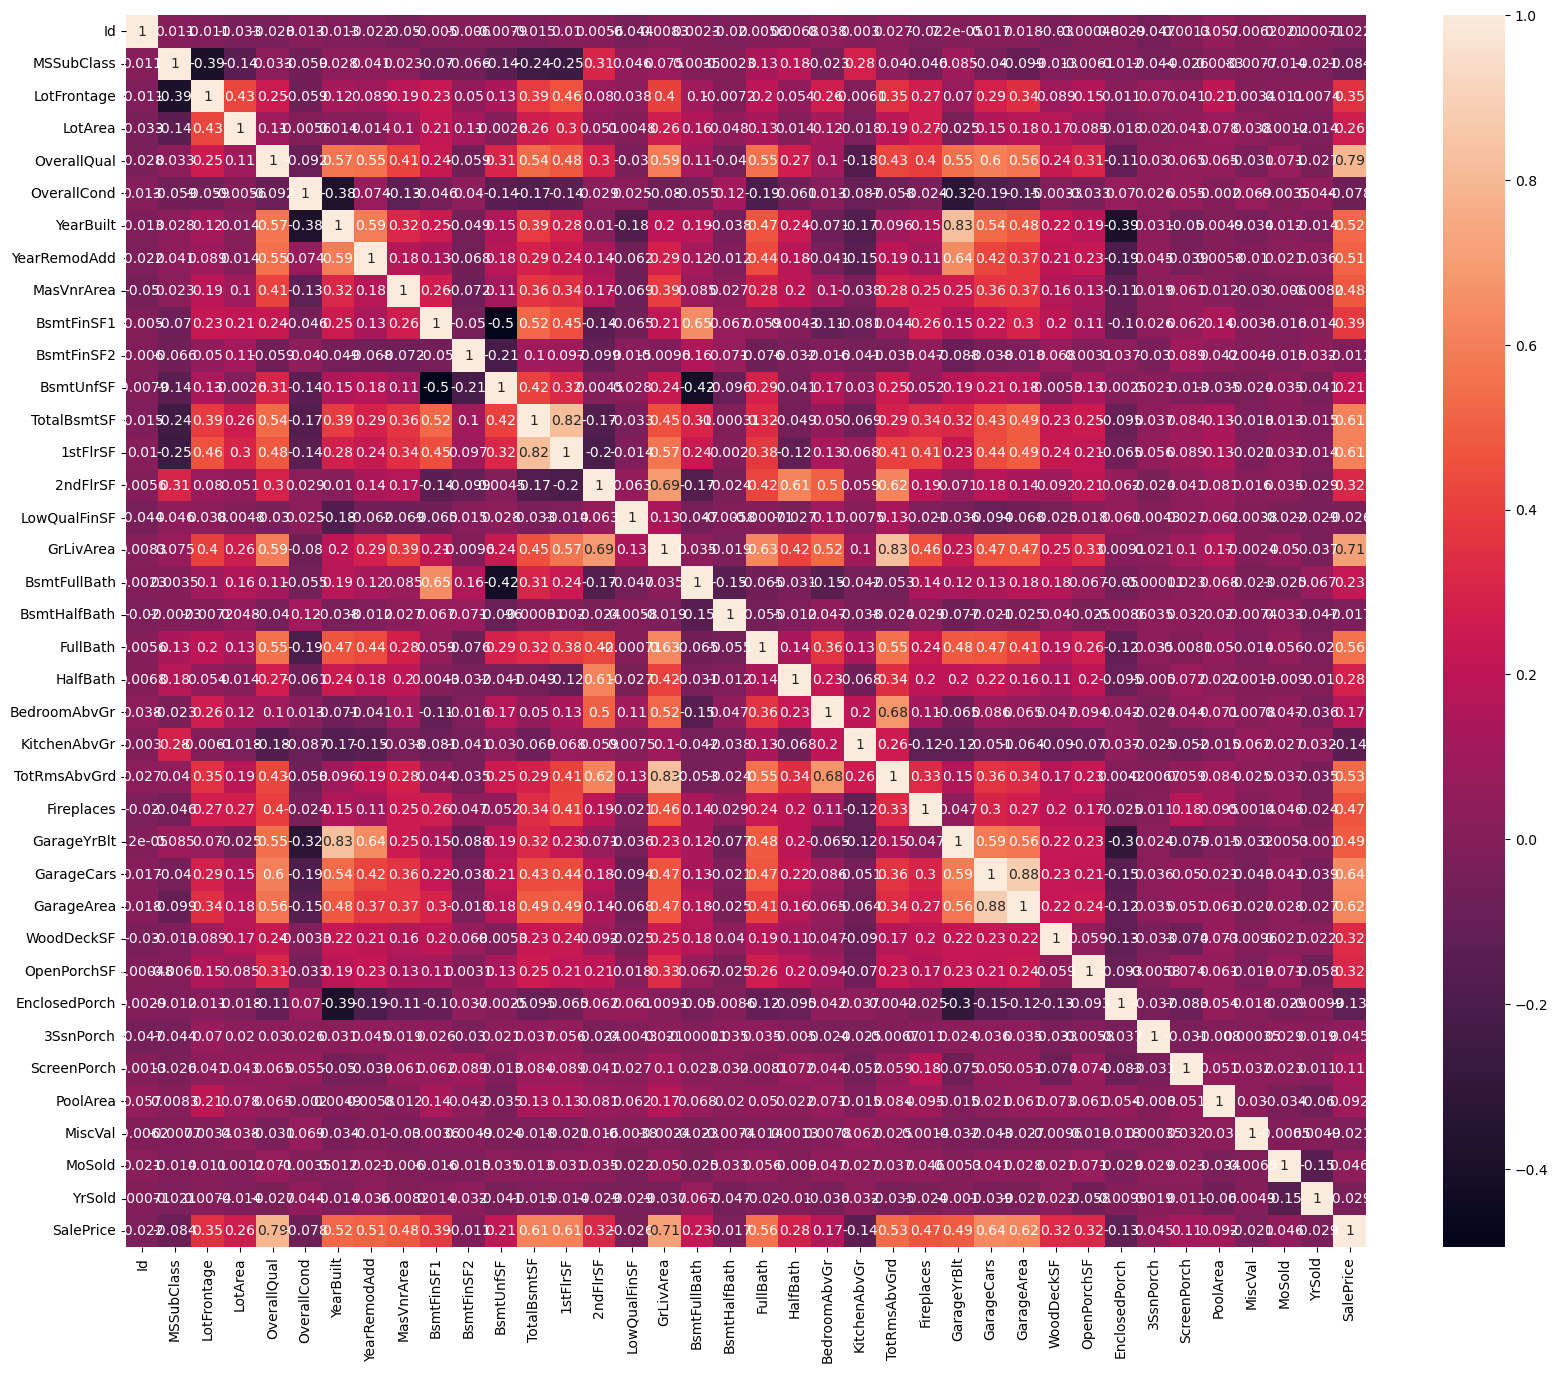

In [10]:
plt.figure(figsize=(20,16))
sns.heatmap(numeric_house.corr(), annot=True)
plt.show()

**Comments**
- some of the features have high corelation with each others.
- GarageCars and GarageArea (0.88)
- GarageYrBlt and YearBlt (0.83)
- TotalRmsAbvGrd and GrLivArea (0.83)
- TotalBsmtSF and 1stflrSF (0.82)

One feature from each of these pair will be dropped after visualization.

**Univariate and Bivariate Analysis - Numerical Feature**

**Analyzing Numerical Features with Continuous Values**

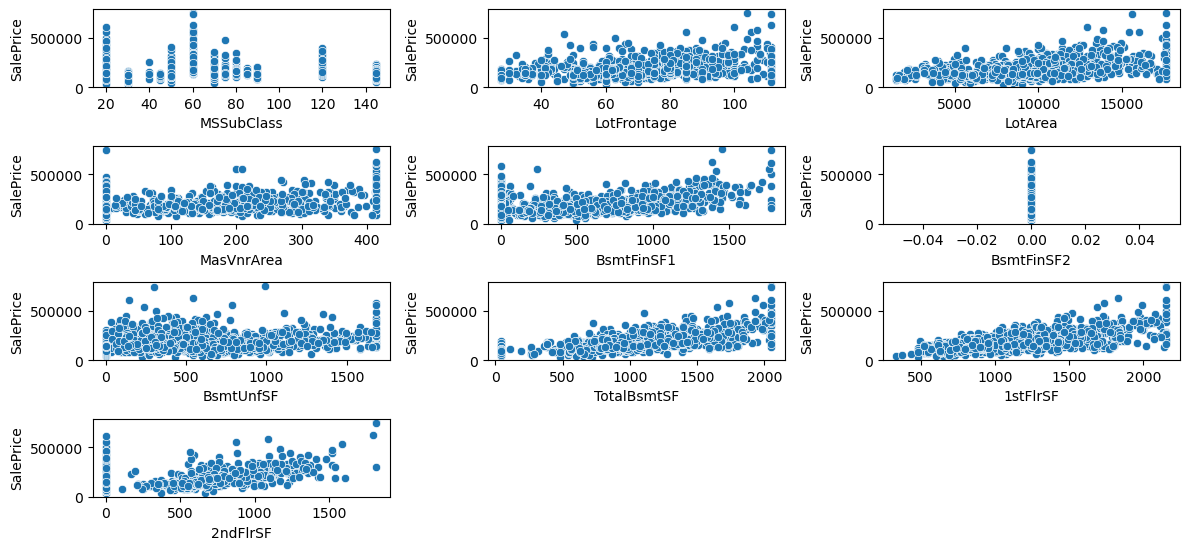

In [11]:
fig=plt.subplots(figsize=(12,12))
for i, feature in enumerate(['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF']):
    plt.subplot(9,3,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.scatterplot(x=house[feature], y=house['SalePrice'])
    plt.tight_layout()

**Comments:**

- **LotFrontage**,**LotArea**,**TotalBsmtSF**,**1stFlrSF**,**2ndFlrSF** are showing the postive correlation with SalePrice.
- **MSSubClass** his discrete values
- **BsmtFinSF2** has single value and can be dropped.

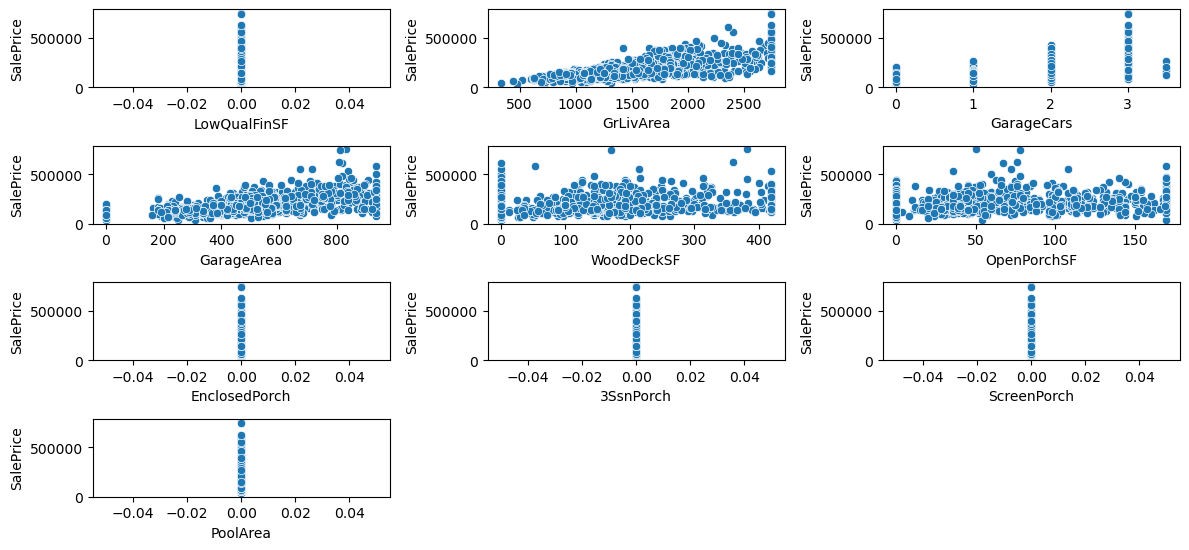

In [12]:
fig=plt.subplots(figsize=(12,12))
for i, feature in enumerate (['LowQualFinSF','GrLivArea','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']):
 plt.subplot(9,3,i+1)
 plt.subplots_adjust(hspace=2.0)
 sns.scatterplot(x=house[feature], y=house['SalePrice'])
 plt.tight_layout()

**Comments:**

- **'GrLivArea','GarageArea'**,showing postive correlation with SalePirce.
- **'LowQualFinSF','EnclosedPorch,'3SsnPorch','ScreenPorch','PoolArea','Miscvar'** feature have single values and can be dropped

**Visualizing the distribution of the numerical features**

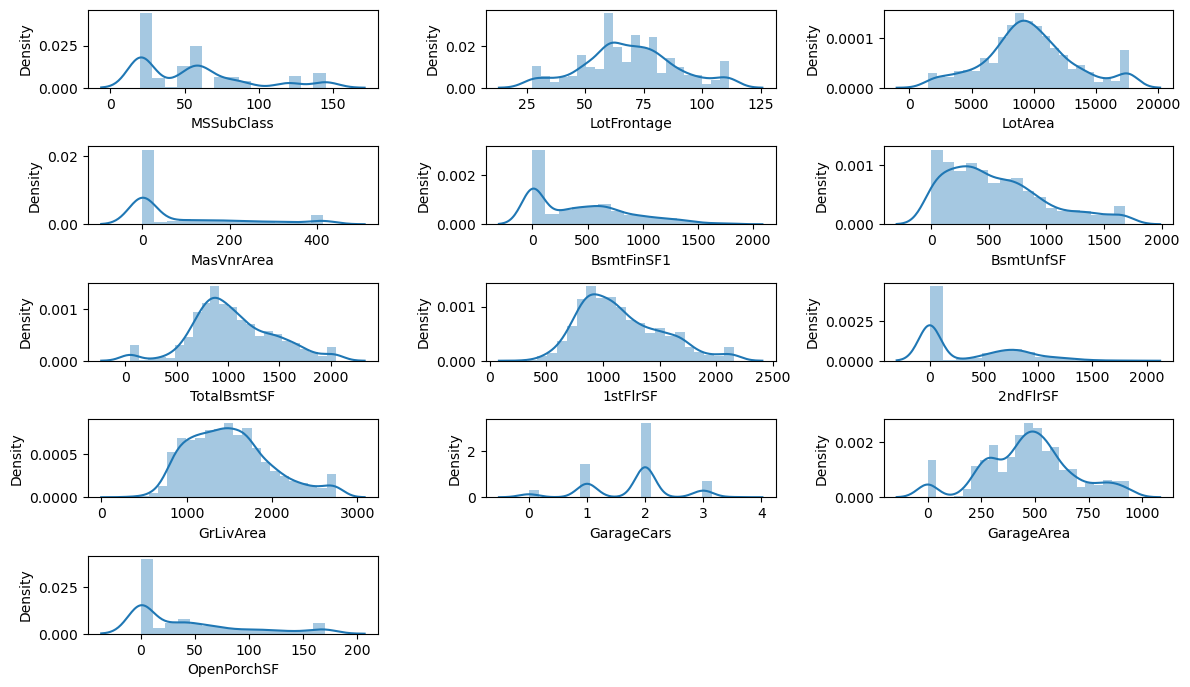

In [13]:
fig=plt.subplots(figsize=(12,12))    
for i, feature in enumerate(['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageCars','GarageArea','OpenPorchSF']):
    plt.subplot(9,3,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.distplot(house[feature])
    plt.tight_layout()

In [14]:
house[['LowQualFinSF','GrLivArea','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']].describe()

,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,1503.735873,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0
std,0.0,481.375641,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0
min,0.0,334.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,1129.500000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,1464.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,1776.750000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,2747.625000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0


Removing these features having fixed values as they won't contribute in predicting SalePrice.

In [15]:
house[['LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']].describe()

,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
house.drop(['LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'], axis=1, inplace=True)

# checking the remaing Columns
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

**Analyzing the Numerical Values with Discrete Values**

In [17]:
house[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]

,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,YearBuilt,YearRemodAdd
0,7,5.0,2,2008,1.0,0,2,1,3.0,1,8,0.0,2003.0,2003,2003
1,6,7.5,5,2007,0.0,0,2,0,3.0,1,6,1.0,1976.0,1976,1976
2,7,5.0,9,2008,1.0,0,2,1,3.0,1,6,1.0,2001.0,2001,2002
3,7,5.0,2,2006,1.0,0,1,0,3.0,1,7,1.0,1998.0,1915,1970
4,8,5.0,12,2008,1.0,0,2,1,4.0,1,9,1.0,2000.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5.0,8,2007,0.0,0,2,1,3.0,1,7,1.0,1999.0,1999,2000
1456,6,6.0,2,2010,1.0,0,2,0,3.0,1,7,2.0,1978.0,1978,1988
1457,7,7.5,5,2010,0.0,0,2,0,4.0,1,9,2.0,1941.0,1941,2006
1458,5,6.0,4,2010,1.0,0,1,0,2.0,1,5,0.0,1950.0,1950,1996


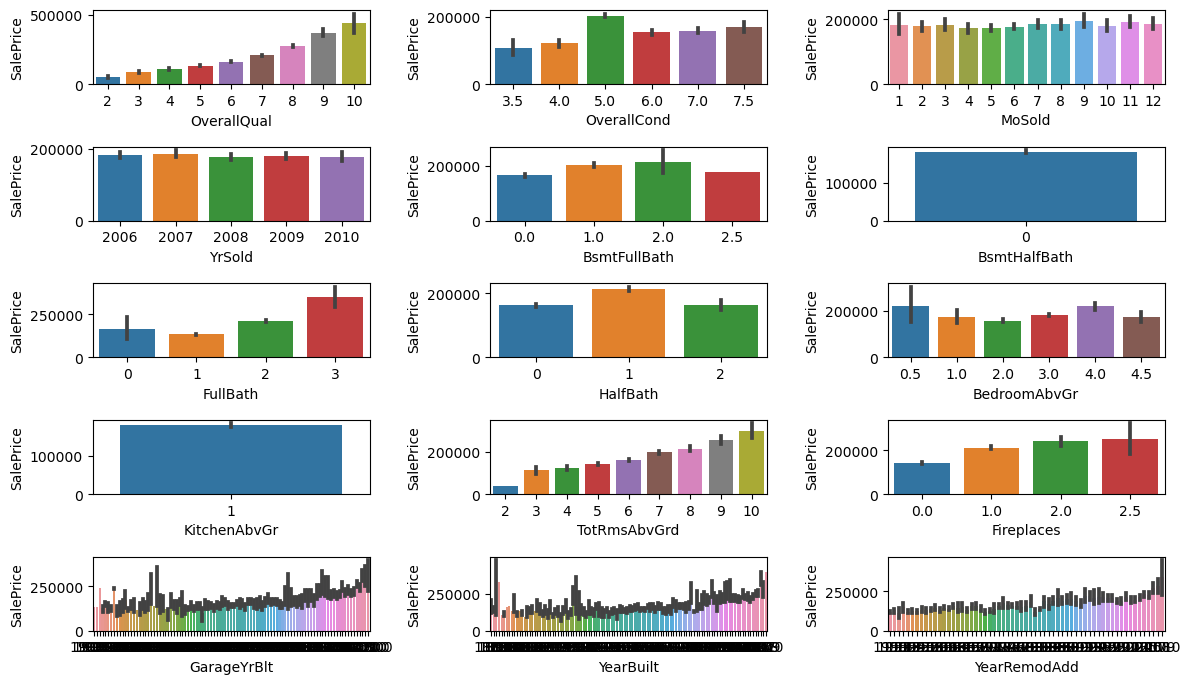

In [18]:
fig=plt.subplots(figsize=(12,12))    
for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9,3,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.barplot(x=house[feature], y=house['SalePrice'])
    plt.tight_layout()

**Comments**
- 'OverallQual': More the rating of the features more the SalePrice (target Variable)
- 'OverallCond' : SalePrice is highest for rating 5.
- 'MoSold' and 'YrSold' : SalePrice  does not show strong trend depending on month and year which realty is sold.
- 'FullBath' : 3rd and "HalfBath": 1 is highest SalePrice.
- 'TotRmsAbvGrd': More the number of total rooms grade more the SalePrice.
- 'GarageYrBlt','YearBuilt','YearRemodAdd','YrSold': Will extract new features from to identify any trend.
- 'BstmFullBath','KitchenAbvGr': Need Further inspection for meaningful insight.

In [19]:
house[['BsmtFullBath','KitchenAbvGr','GarageYrBlt','YearBuilt','YearRemodAdd']].describe()

,BsmtFullBath,KitchenAbvGr,GarageYrBlt,YearBuilt,YearRemodAdd
count,1460.000000,1460.0,1379.000000,1460.000000,1460.000000
mean,0.425000,1.0,1978.506164,1971.299315,1984.865753
std,0.517373,0.0,24.689725,30.108397,20.645407
min,0.000000,1.0,1900.000000,1885.000000,1950.000000
25%,0.000000,1.0,1961.000000,1954.000000,1967.000000
50%,0.000000,1.0,1980.000000,1973.000000,1994.000000
75%,1.000000,1.0,2002.000000,2000.000000,2004.000000
max,2.500000,1.0,2010.000000,2010.000000,2010.000000


In [20]:
print(house['BsmtFullBath'].value_counts())
print(house['KitchenAbvGr'].value_counts())

0.0    856
1.0    588
2.0     15
2.5      1
Name: BsmtFullBath, dtype: int64
1    1460
Name: KitchenAbvGr, dtype: int64


In [21]:
# Dropping the KitchenAbvGr for not having useful information
house.drop(['KitchenAbvGr'],axis=1, inplace=True)

In [22]:
house[['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold']].describe()

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
count,1379.000000,1460.000000,1460.000000,1460.000000
mean,1978.506164,1971.299315,1984.865753,2007.815753
std,24.689725,30.108397,20.645407,1.328095
min,1900.000000,1885.000000,1950.000000,2006.000000
25%,1961.000000,1954.000000,1967.000000,2007.000000
50%,1980.000000,1973.000000,1994.000000,2008.000000
75%,2002.000000,2000.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [23]:
# Converting the year related features into numbers of years.
for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold']:
    house[feature] = 2021 - house[feature]

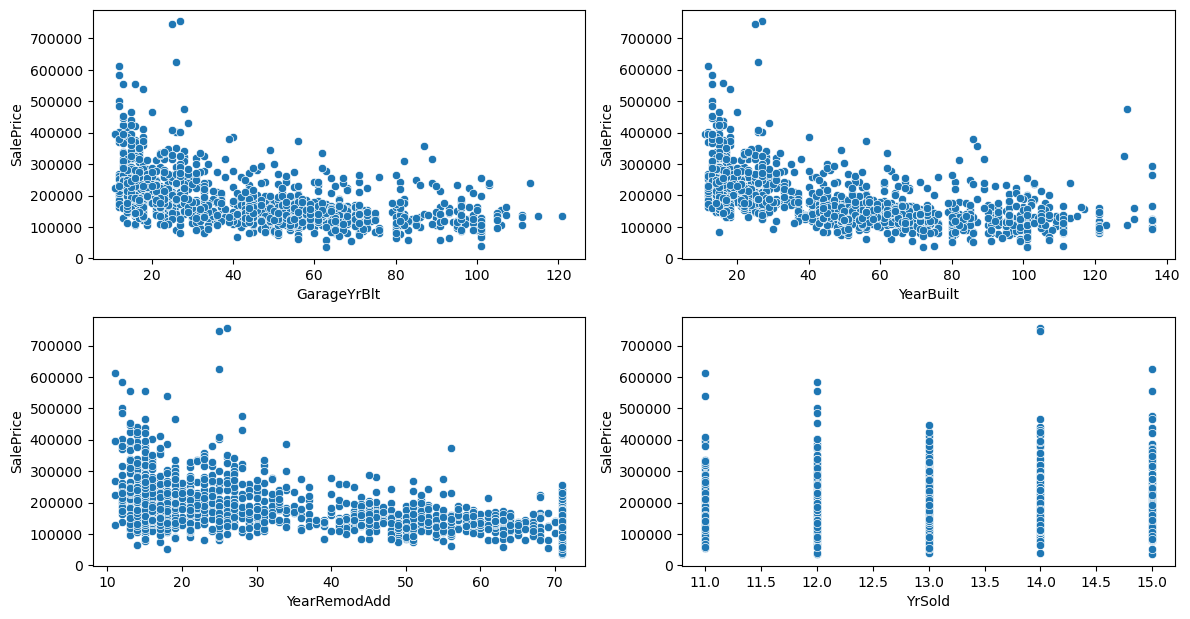

In [24]:
fig=plt.subplots(figsize=(12,12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold']):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.scatterplot(x=house[feature], y=house['SalePrice'])
    plt.tight_layout()

**Comments:**
- For Most the realty properties Garage is built within 20 years. SalePrice is more recently built Garages.
- SalePrice is more than lower value of YearBuilt i.e. more recently build houses.
- Recently remodelled houses (lower values of YearRomdAdd) have higher SalePrice.
- YrSold still does not any sigmificant trend

**Missing Value Handling - Numerical Features**

In [25]:
print("Feature: Percentage of Missing Value")
print("====================================")
for feat in house.select_dtypes(exclude=['object']).columns:
    if house[feat].isnull().any():
        print(feat," : ", round(house[feat].isnull().sum()/house.shape[0],2)*100)

Feature: Percentage of Missing Value
LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


In [26]:
# Since MasVnrArea has only 1% data missing, droping the row with Null Values in MasVnrArea  
# Dropping the ID columns as it doesnot contribute towards predicting SalePrice.

house = house[~house['MasVnrArea'].isnull()]
house.drop(['Id'],axis=1, inplace=True)
numeric_house.drop(['Id'],axis=1, inplace=True)

In [27]:
# Check the number of remaining columns
house.columns.shape

(73,)

**Comments:**
- GarageCars and GarageArea (Correlation Coefficient = 0.88) dropping GarageCars
- GarageYrBlt and YearBlt (Correlation Coefficient = 0.83) dropping GarageYrBlt for high correlation and containing missing value.
- TotalRmsAbvGrd and GrLivArea (Correlation Coefficient = 0.83) dropping GrLivArea
- TotalBsmtSF and 1stflrSF (Correlation Coefficient = 0.82) dropping TotalBsmtSF
- Missing Value Imputation to be done for house["LotFrontage"] after spilitting data into train and test set to avoid data leakage.

In [28]:
house.drop(['GarageCars','GarageYrBlt','GrLivArea','TotalBsmtSF'], axis=1, inplace=True)

# Checking the number of remaining columns
print(house.columns.shape)

(69,)


### Analyzing Categorical Features

In [29]:
# Categorical Feature in the DataFrames

categorical_house.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

**Missing Value Handling - Categorical Features**

In [30]:
print("Feature: Percentage of Missing Value")
print("====================================")
for feat in house.select_dtypes(include=['object']).columns:
    if house[feat].isnull().any():
        print(feat, ':' , round(house[feat].isnull().sum()/house[feat].shape[0],2)*100)

Feature: Percentage of Missing Value
Alley : 94.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 100.0
Fence : 81.0
MiscFeature : 96.0


In [31]:
house['Electrical'].isnull().sum()

1

In [32]:
house['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

**Comments:**

- For 'Alley' Nan Means 'No access to alley.
- For 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2' Nan_means "No Bassement"
- For GarageType, GarageFinish, GarageQual, GarageCond Nan means "No Garage"
- Fpr FriplaceQu and Fence Nan means 'No Fire' Place and 'No Fence'
- MiscFeature - Nan means no additional features mentioned.

All these feature will be imputed with meaningful values in place of missing data. 

In [33]:
mv_categorical_feat = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu','Fence','MiscFeature']
print(house[mv_categorical_feat].isnull().sum())

Alley           1362
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      686
Fence           1171
MiscFeature     1398
dtype: int64


In [34]:
# Imputing Missing Values with "Not_applicable"
house[mv_categorical_feat]= house[mv_categorical_feat].fillna(value="Not_applicable",axis=1)

# Check after imputation
print(house[mv_categorical_feat].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [35]:
# Dropping the "PoolQC" for very high percentage of data imbalance
house.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in Electrical for very low missing value count.
house.dropna(subset=["Electrical"],inplace=True)

In [36]:
print("Feature : Percentage of Missing Values")
print("======================================")
for feat in house.columns:
    print(feat, ':', round(house[feat].isnull().sum()/house[feat].shape[0], 2)*100)

Feature : Percentage of Missing Values
MSSubClass : 0.0
MSZoning : 0.0
LotFrontage : 18.0
LotArea : 0.0
Street : 0.0
Alley : 0.0
LotShape : 0.0
LandContour : 0.0
Utilities : 0.0
LotConfig : 0.0
LandSlope : 0.0
Neighborhood : 0.0
Condition1 : 0.0
Condition2 : 0.0
BldgType : 0.0
HouseStyle : 0.0
OverallQual : 0.0
OverallCond : 0.0
YearBuilt : 0.0
YearRemodAdd : 0.0
RoofStyle : 0.0
RoofMatl : 0.0
Exterior1st : 0.0
Exterior2nd : 0.0
MasVnrType : 0.0
MasVnrArea : 0.0
ExterQual : 0.0
ExterCond : 0.0
Foundation : 0.0
BsmtQual : 0.0
BsmtCond : 0.0
BsmtExposure : 0.0
BsmtFinType1 : 0.0
BsmtFinSF1 : 0.0
BsmtFinType2 : 0.0
BsmtFinSF2 : 0.0
BsmtUnfSF : 0.0
Heating : 0.0
HeatingQC : 0.0
CentralAir : 0.0
Electrical : 0.0
1stFlrSF : 0.0
2ndFlrSF : 0.0
BsmtFullBath : 0.0
BsmtHalfBath : 0.0
FullBath : 0.0
HalfBath : 0.0
BedroomAbvGr : 0.0
KitchenQual : 0.0
TotRmsAbvGrd : 0.0
Functional : 0.0
Fireplaces : 0.0
FireplaceQu : 0.0
GarageType : 0.0
GarageFinish : 0.0
GarageArea : 0.0
GarageQual : 0.0
GarageC

Missing Values imputation will be done after Spliting Training and testing set avoid data leakage

In [37]:
house.columns.shape

(68,)

In [38]:
# Function to generate the boxplot for SalePrice against different features given the list of features

def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20,16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace=2.0)
        sns.boxplot(x=house[feature], y=house['SalePrice'])
        plt.tight_layout()

divided the ordinal feature into smaller segement and Visualizing their impact on SalePrice

**Analyzing Orderred Features**

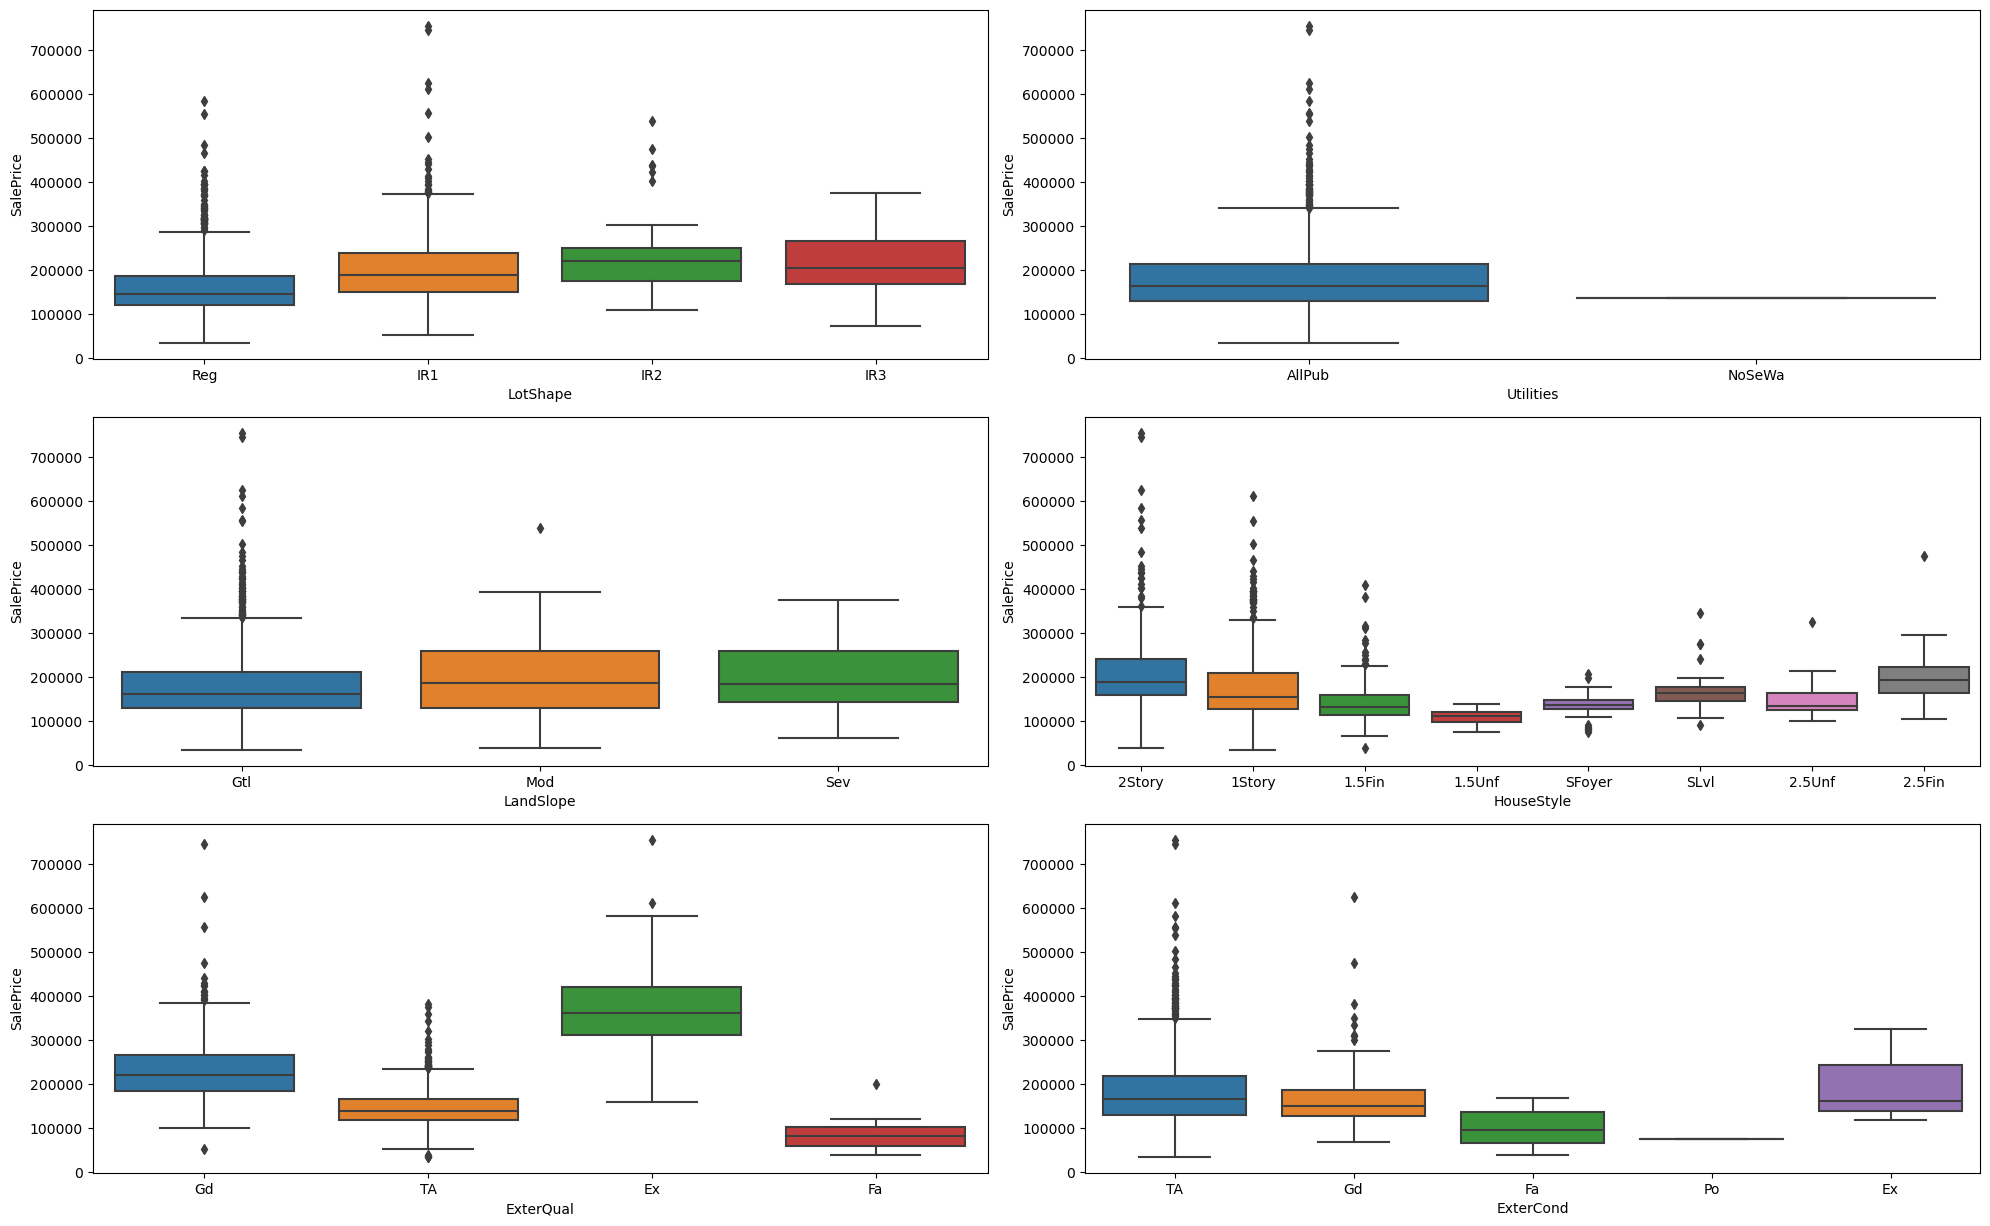

In [39]:
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']
generate_boxplot(ext_features)


**Comments**
- LotShape : Slightly irregular LotShape have the highest SalePrice
- Utilities : Most of the house in the dataset have all the public utilities
- LandSlope : House at severse land slope have lowest SalePrice
- HouseStyle : 2 storied houses have the highest SalePrice
- ExterQual : House with Excellent qualtity of material on the exterior have the highest SalePrice
- ExterCond : House with Excellent condition of material on the exterior have the highest SalePrice

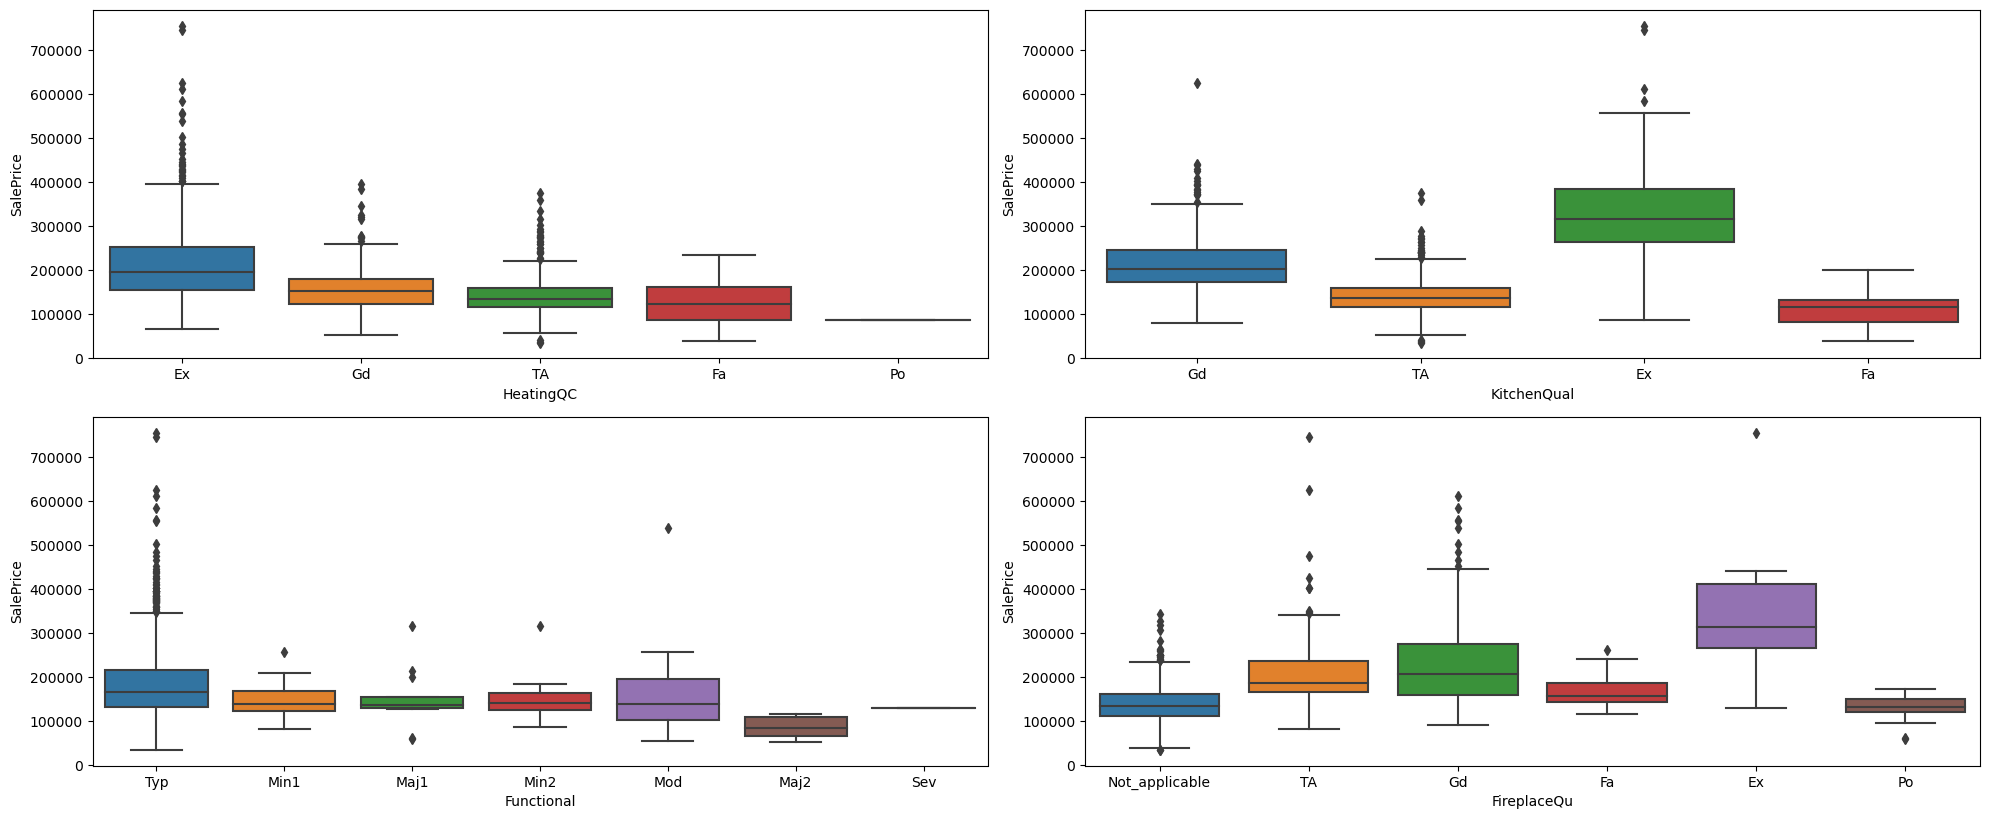

In [40]:
int_features = ['HeatingQC','KitchenQual','Functional','FireplaceQu']
generate_boxplot(int_features)

**Comments**

- House having excellent heating quality and Kitchen quality have highest SalePrice
- House With Typical funcationally have highest SalePrice. There are very few house that are severely damaged
- SalePirce range in Largest for house with average firplace quality

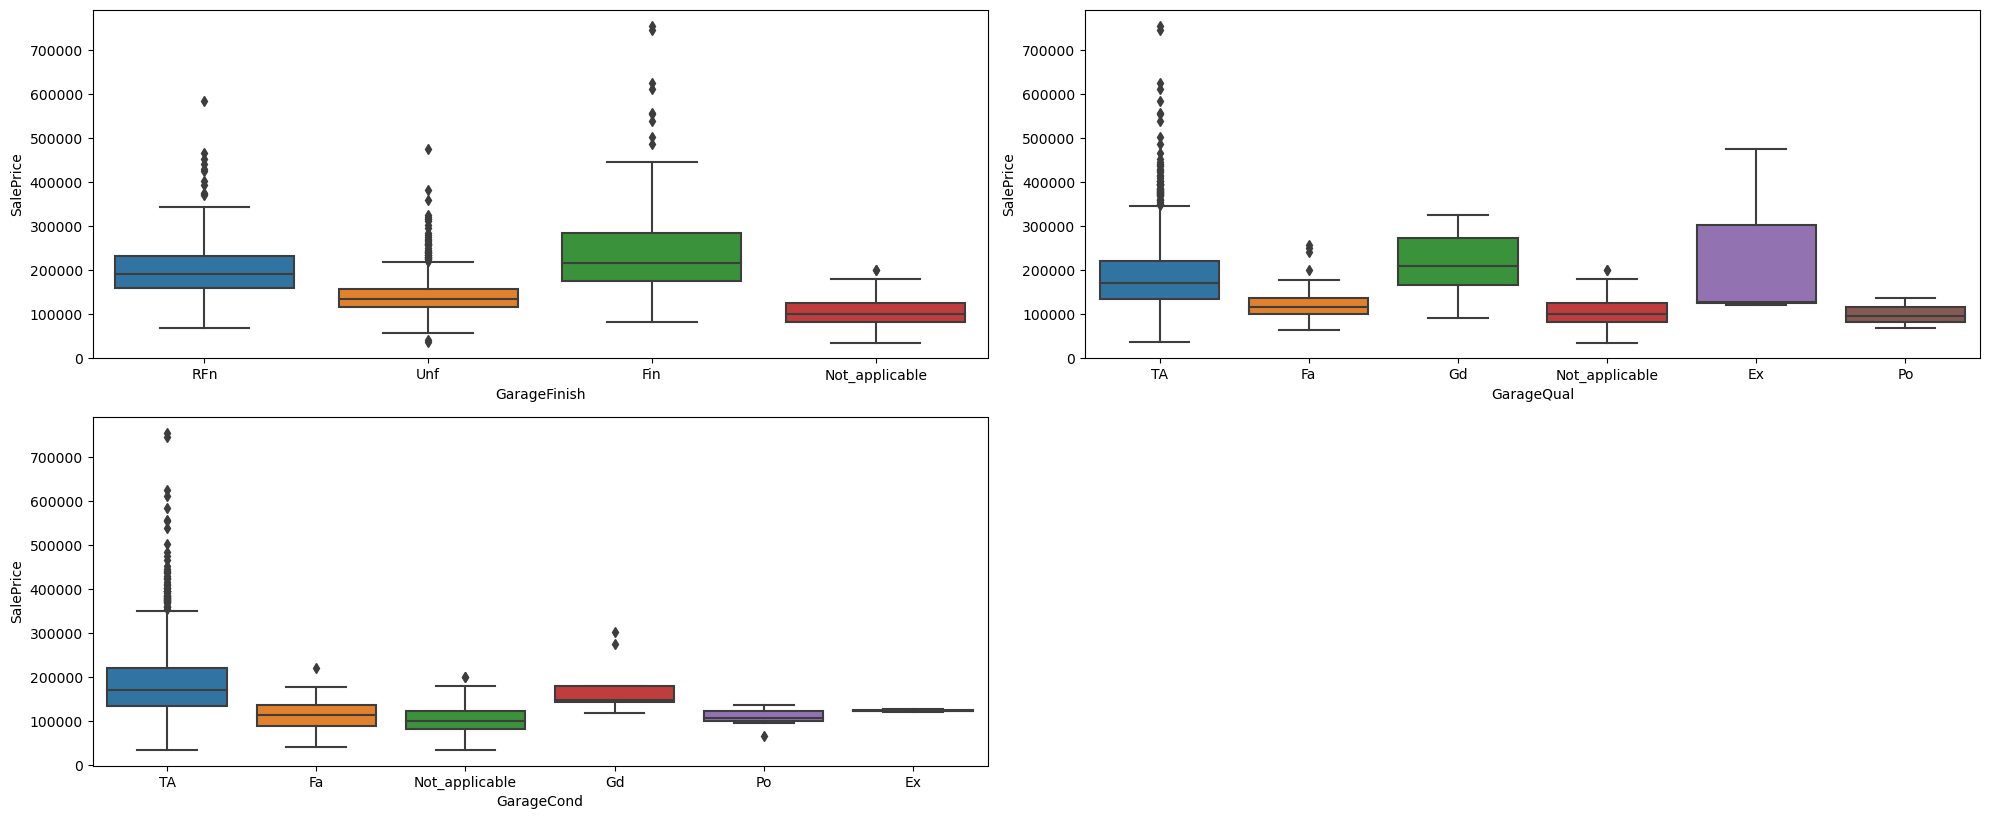

In [41]:
garage_feature = ['GarageFinish','GarageQual','GarageCond']
generate_boxplot(garage_feature)

**Comments**
- SalePrice is highest of Garage is Finished
- The Range of SalePrice is widest for Typical/Average Garage qualtiy and Condition.
- there are very few house with excellent condition of garage

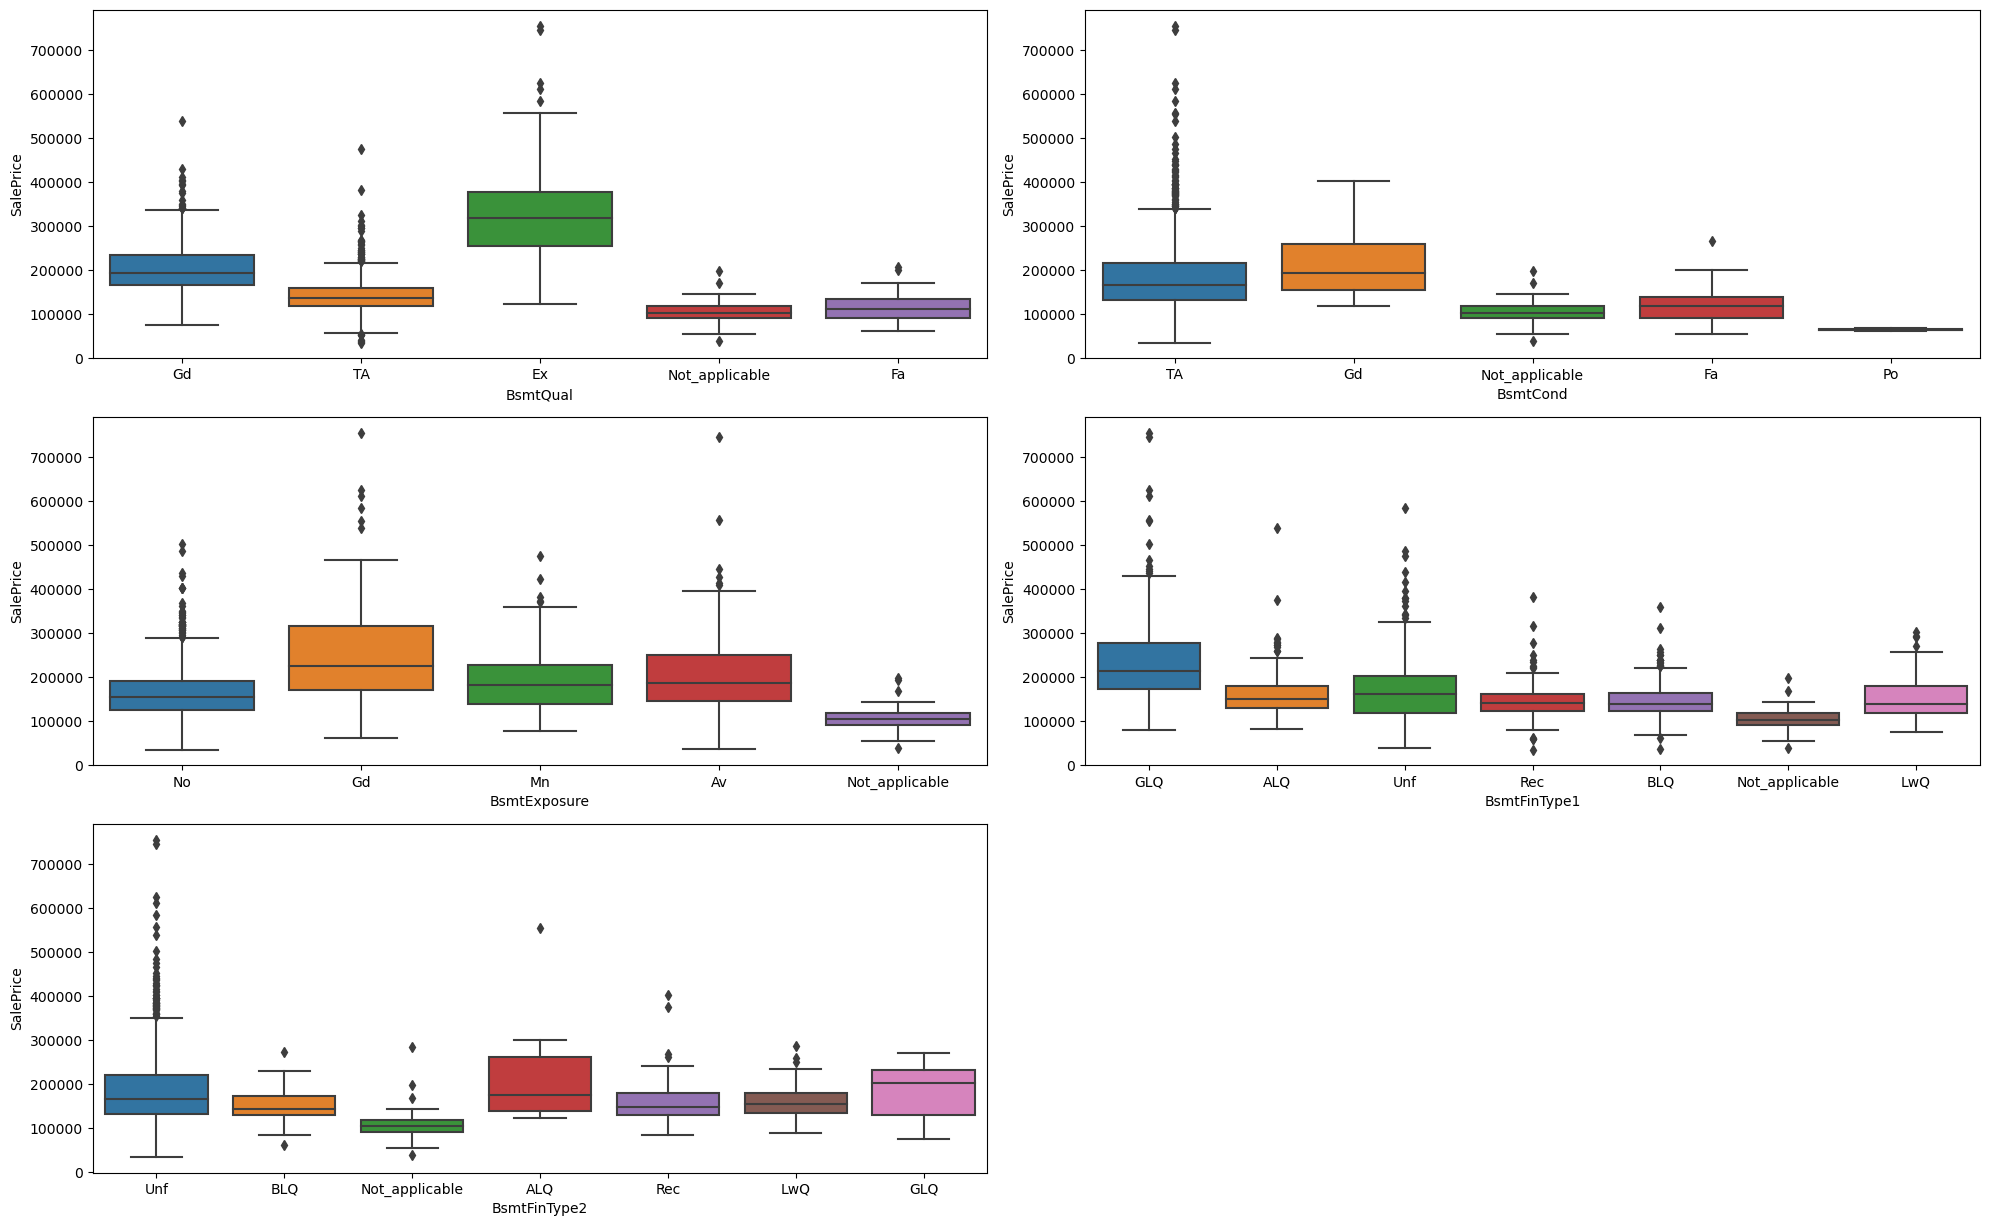

In [42]:
bassement_feature = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
generate_boxplot(bassement_feature)

**Comment**

- House with Excellwnt Quality bassement have highest SalePrice
- House with good living quarters (BsmtFinshType1=GLQ) have highest SalePrice
- A lost of house have unfinished basement or no bassement (label = Not_applicable)

**Ecoding Categorical Features**

In [43]:
# LotShape into numerical values
house['LotShape']=house['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
# Utilities into numerical values
house['Utilities']=house['Utilities'].map({'AllPub':3,'NoSewr':2,'NoSeWa':1,'ELO':0})
# LotShape into numerical values
house['LandSlope']=house['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
# HouseStyle into numerical values
house['HouseStyle']=house['HouseStyle'].map({'1Story':0,'1.5Fin':1,'1.5Unf':2,'2Story':3,'2.5Fin':4,'2.5Unf':5,'SFoyer':6,'SLvl':7})
# ExterQual into numerical values
house['ExterQual']=house['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
# ExterCond into numerical values
house['ExterCond']=house['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
# BsmtQual into numerical values
house['BsmtQual']=house['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
# BsmtCond into numerical values
house['BsmtCond']=house['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
# BsmtExposure into numerical values
house['BsmtExposure']=house['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})                                                                              
# BsmtFinType1 into numerical values
house['BsmtFinType1']=house['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
# BsmtFinType2 into numerical values
house['BsmtFinType2']=house['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
# HeatingQC into numerical values
house['HeatingQC']=house['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
# CentralAir into numerical values
house['CentralAir']=house['CentralAir'].map({'N':0,'Y':1})
# KitchenQual into numerical values
house['KitchenQual']=house['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
# GarageFinish into numerical values
house['GarageFinish']=house['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
# GarageQual into numerical values
house['GarageQual']=house['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
# GarageCond into numerical values
house['GarageCond']=house['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
# Functional into numerical values
house['Functional']=house['Functional'].map({'Typ':0,'Min1':1,'Min2':3,'Mod':4,'Maj1':5,'Maj2':6,'Fa':7,'Sev':8,'Sal':9})
# FireplaceQu into numerical values
house['FireplaceQu']=house['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})


In [44]:
# Checkingthe Features after encoding
house[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
'HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1451 non-null   int64
 1   Utilities     1451 non-null   int64
 2   LandSlope     1451 non-null   int64
 3   HouseStyle    1451 non-null   int64
 4   ExterQual     1451 non-null   int64
 5   ExterCond     1451 non-null   int64
 6   BsmtQual      1451 non-null   int64
 7   BsmtCond      1451 non-null   int64
 8   BsmtExposure  1451 non-null   int64
 9   BsmtFinType1  1451 non-null   int64
 10  BsmtFinType2  1451 non-null   int64
 11  HeatingQC     1451 non-null   int64
 12  KitchenQual   1451 non-null   int64
 13  Functional    1451 non-null   int64
 14  FireplaceQu   1451 non-null   int64
 15  GarageFinish  1451 non-null   int64
 16  GarageQual    1451 non-null   int64
 17  GarageCond    1451 non-null   int64
dtypes: int64(18)
memory usage: 215.4 KB


In [45]:
unordered_feature = ['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','RoofStyle',
'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','GarageType','PavedDrive','Fence',
'MiscFeature','SaleType','SaleCondition']

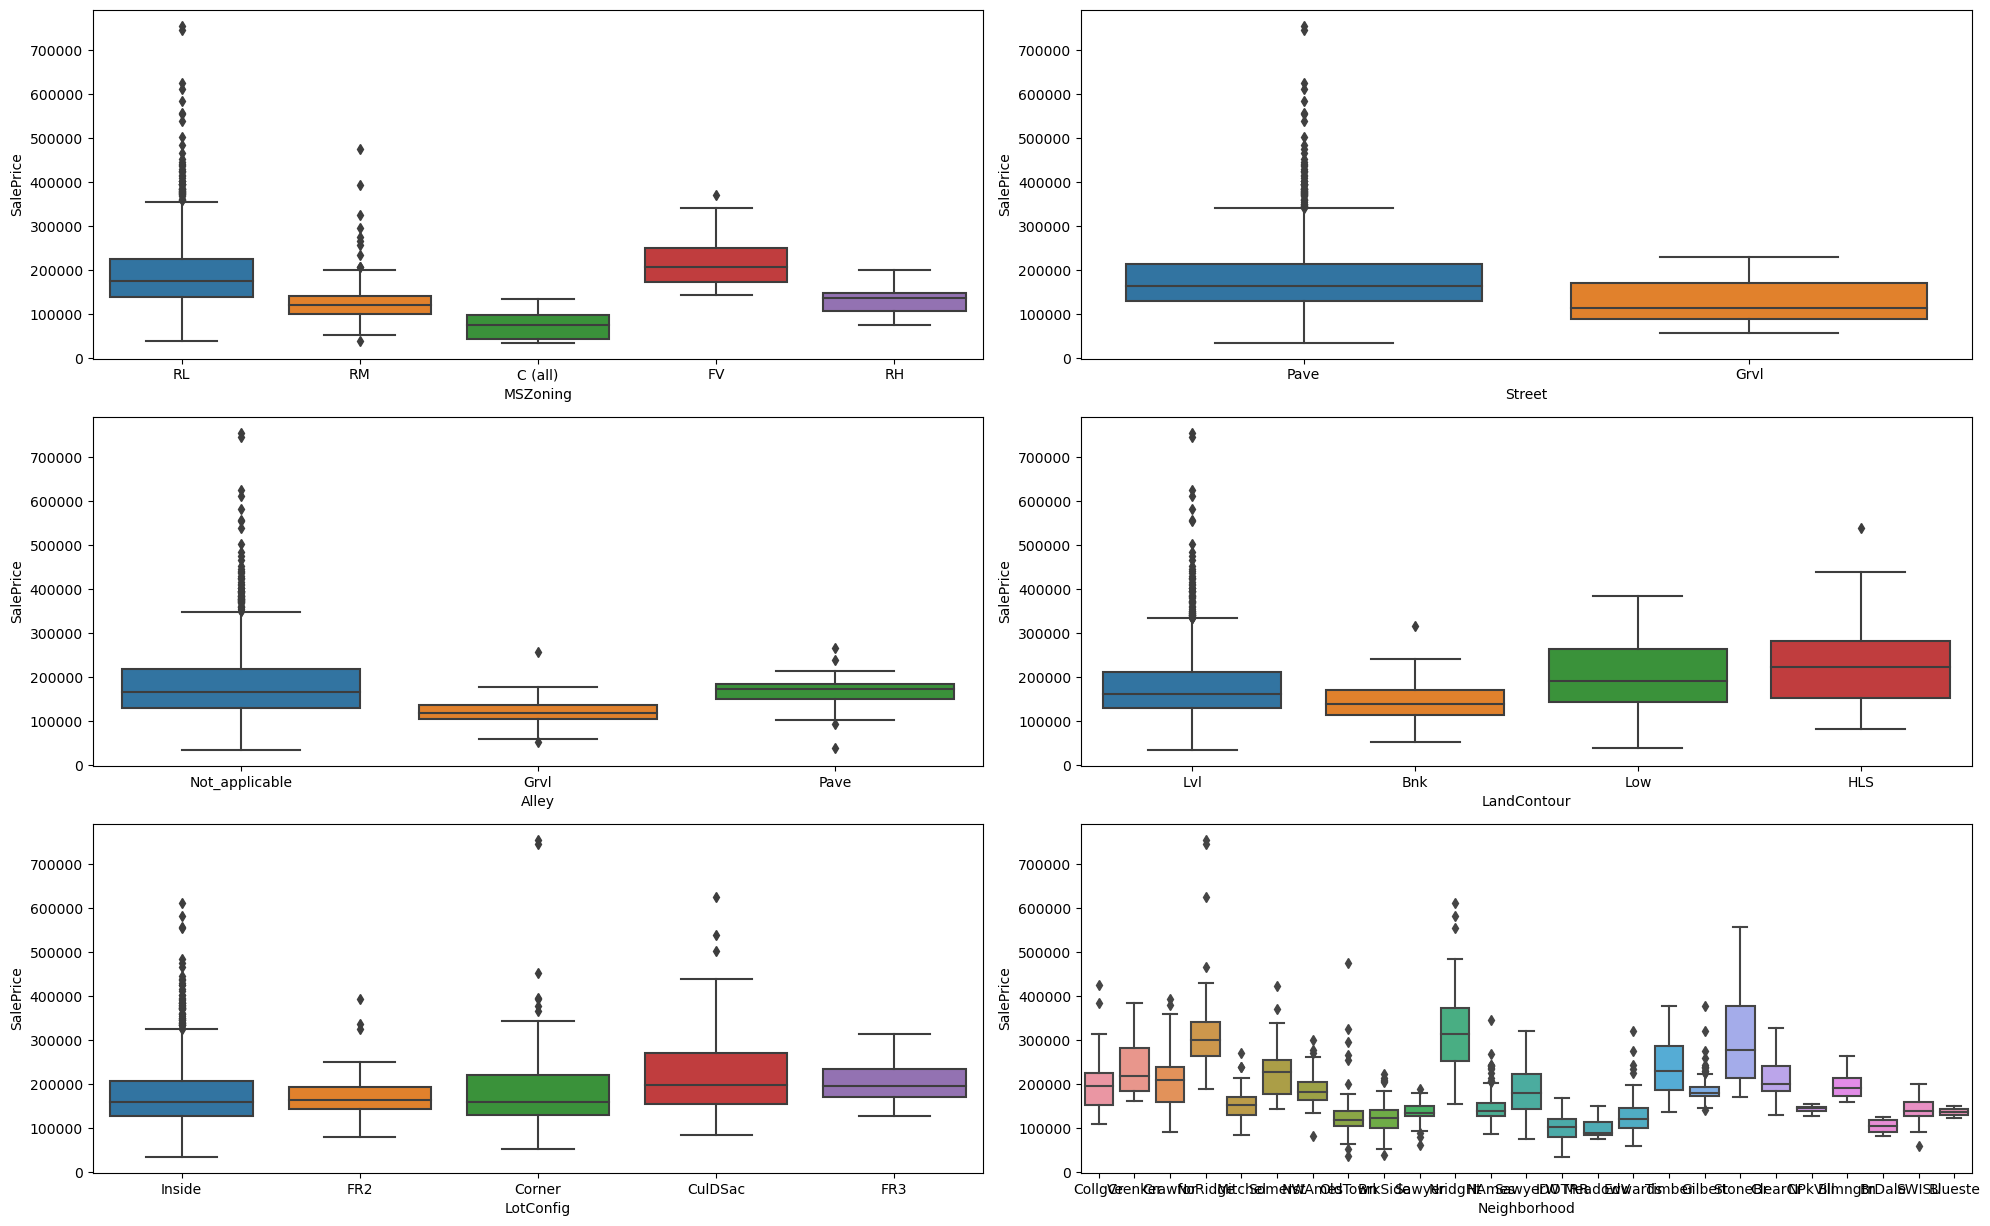

In [46]:
generate_boxplot(['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood'])

**Comments:**
- Most of the houses do not have alley
- Neighborhood has a lots of labels, using one hot coding directly would leads to high numbers of additional columns
- house claasified as MSZoning = RL or Residentil Low density have the highest SalePrice 

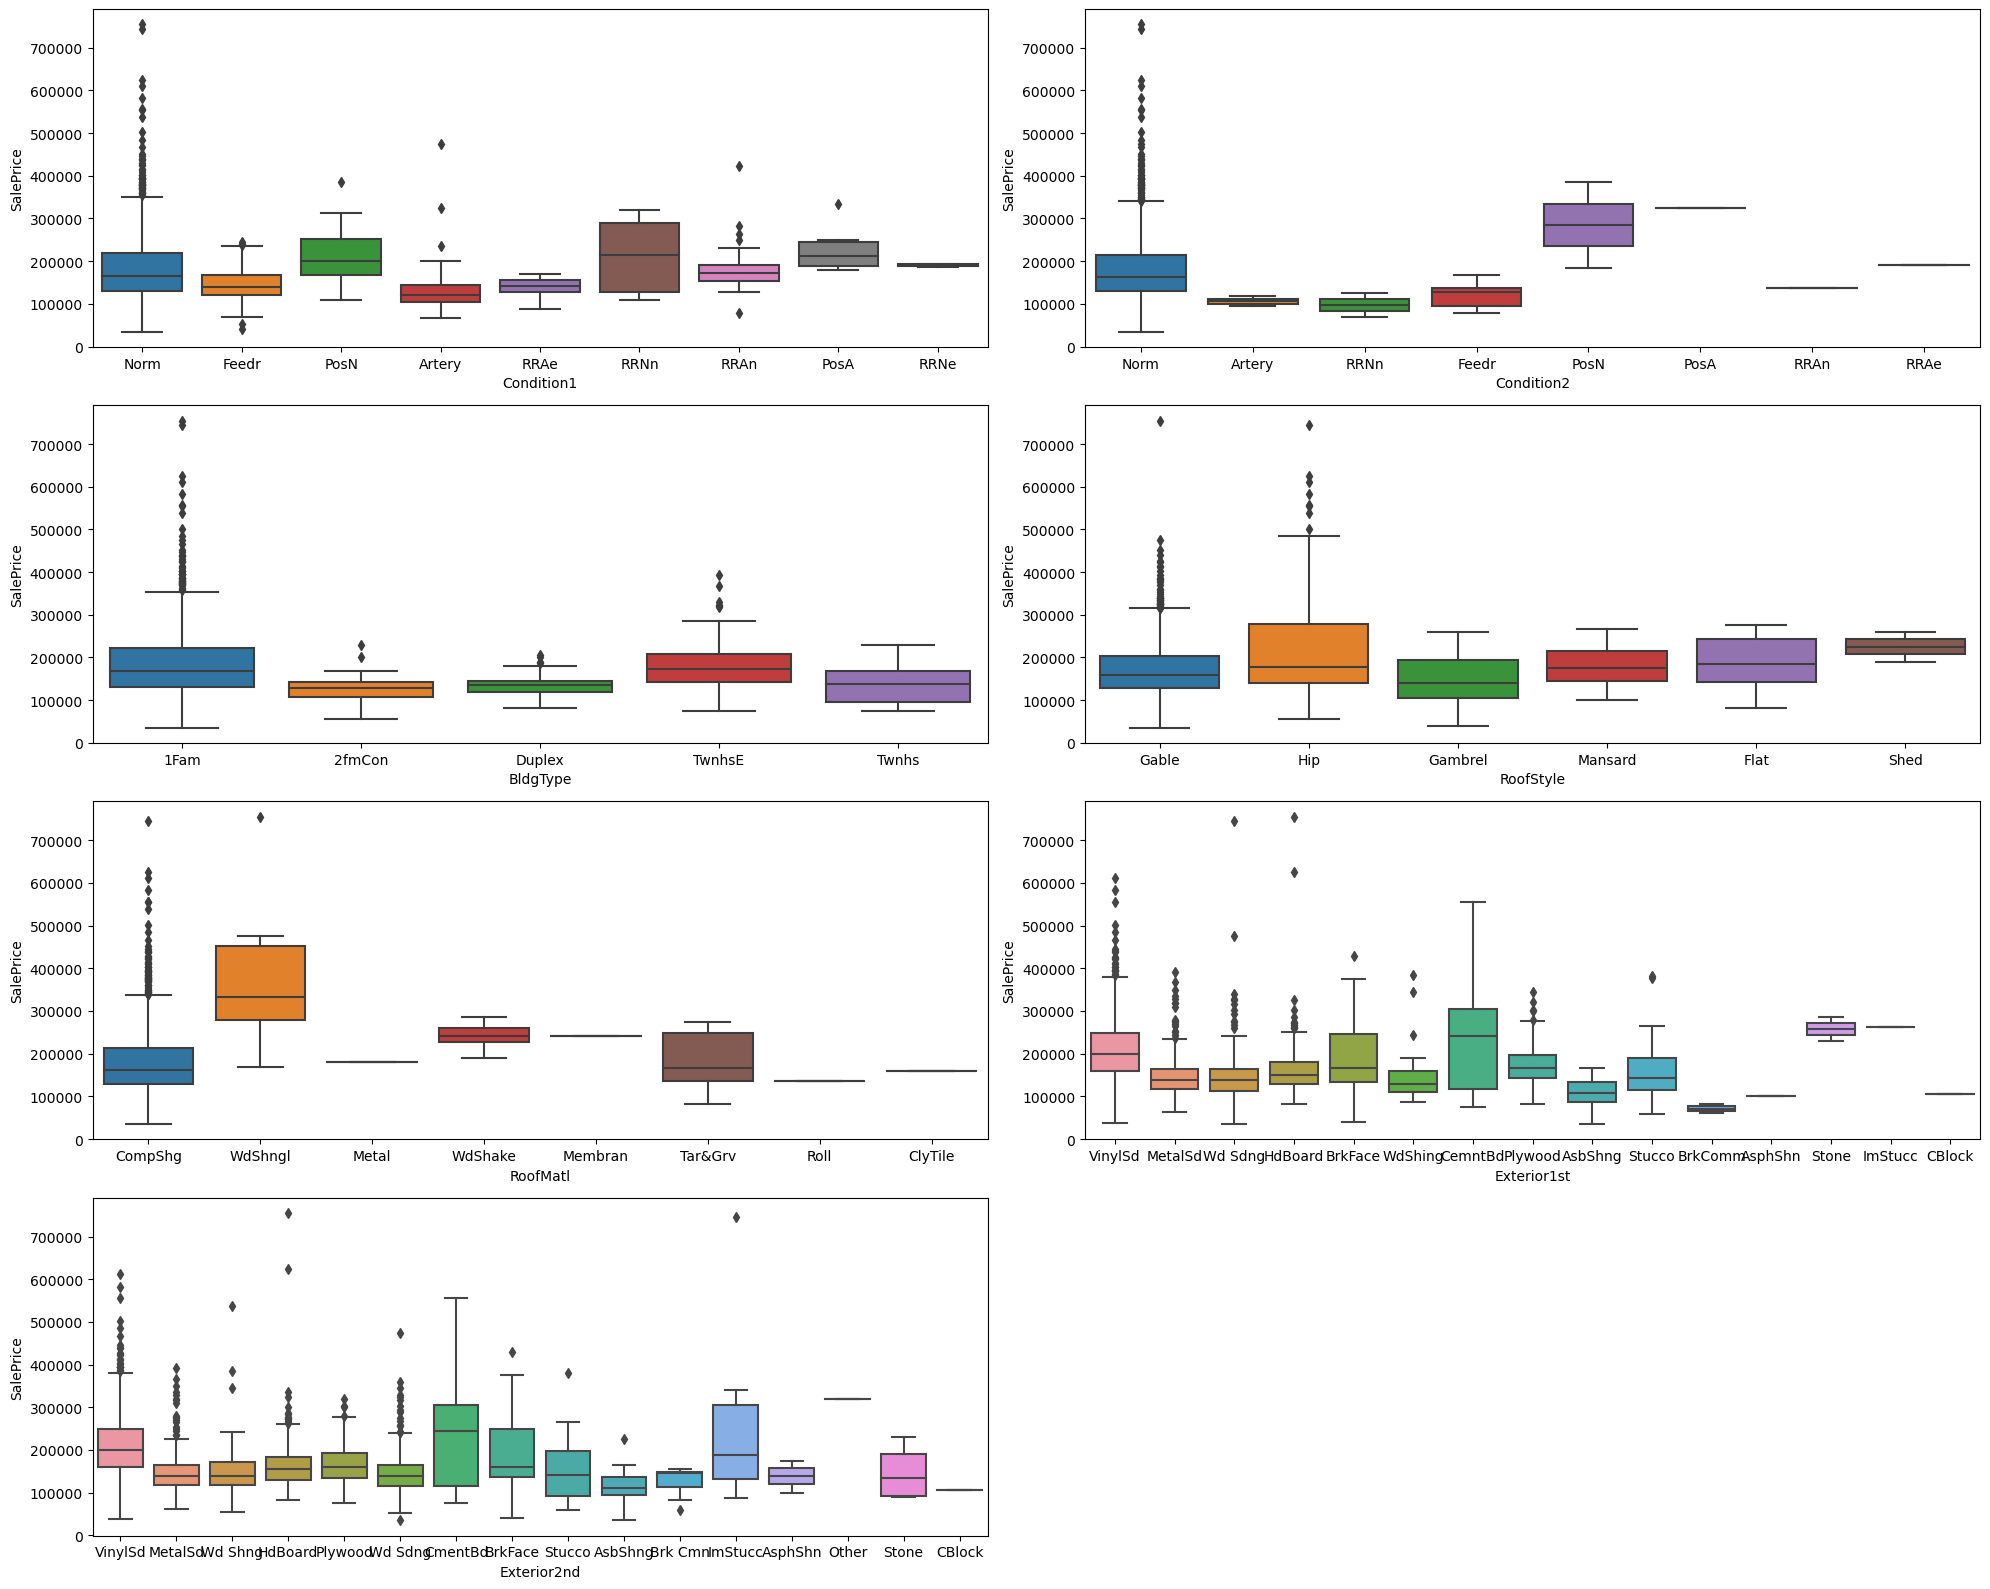

In [47]:
generate_boxplot(['Condition1','Condition2','BldgType','RoofStyle',
'RoofMatl','Exterior1st','Exterior2nd'])

**Comments**

- Normal Condition ( condition1 = Norm and Condtion2 =Nrm) House are likely to have high SalePrice
- Feature like 'RoofMat Exterior1st,Exterior2nd have labels with very few data this cannot contiribute in prediciting SalePrice.

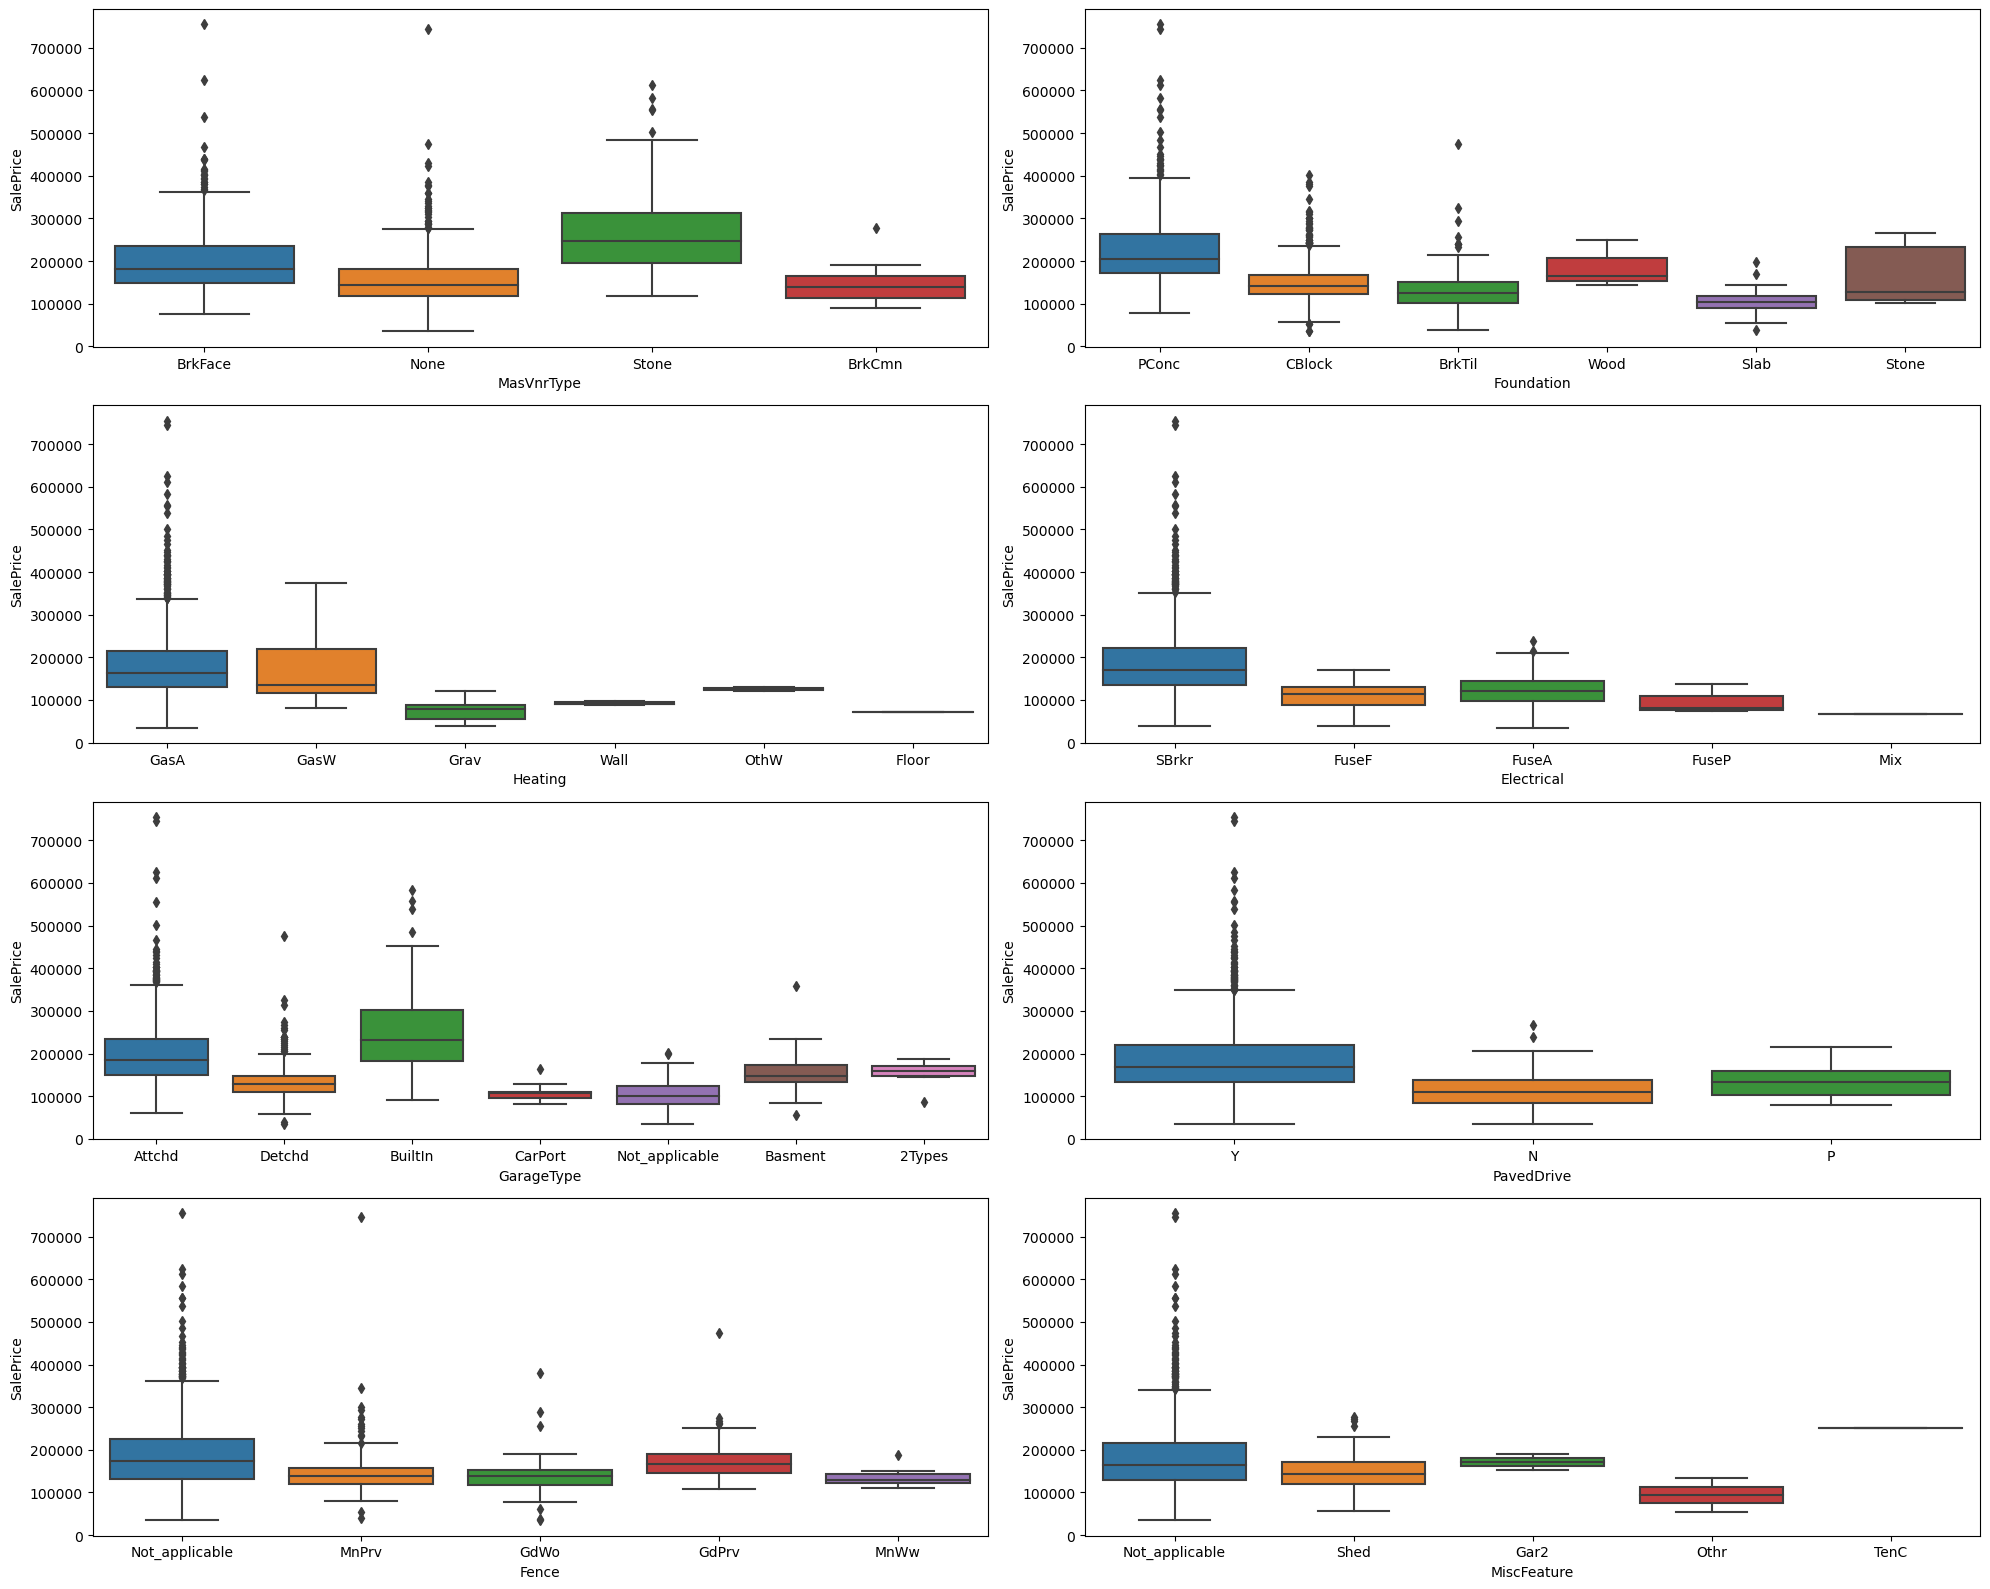

In [48]:
generate_boxplot(['MasVnrType','Foundation','Heating','Electrical','GarageType','PavedDrive','Fence',
'MiscFeature'])

**Comments**

- Houses with foundation of poured concrete ( FOundation =PConc) and/or Electical with Standard Circul Break and/or Heating Type = GasA have the highest price
- Houses With Attached and built in garage have high SalePrice
- Most of the House do not have fence(fence=Not fence)

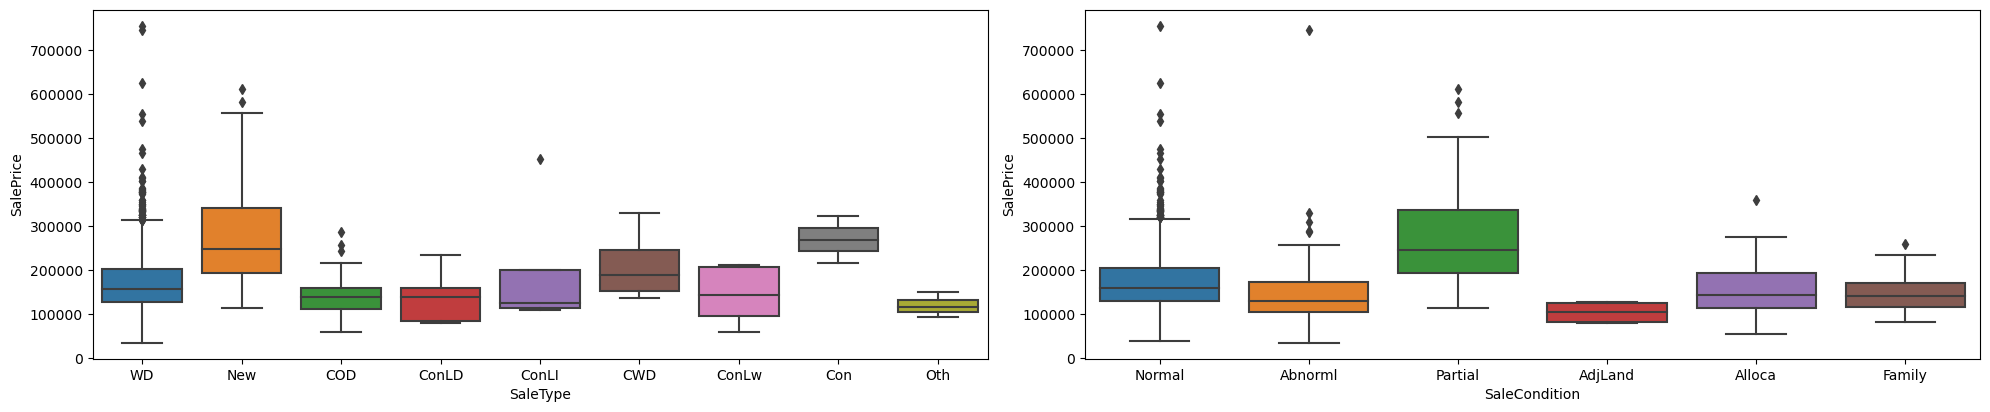

In [49]:
generate_boxplot(['SaleType','SaleCondition'])

**Comment**
- Most of the house are newly built houses with warranty deed have high SalePrice
- Sale Condition = Normal leads to high SalePrice

**Encoding Categorical Variables**

In [50]:
dummy_df = pd.get_dummies(house[unordered_feature],drop_first=True)

In [51]:
dummy_df.shape

(1451, 144)

**Comment:**
- Adding 144 features to exisiting dataset will make the model complex
- From the above boxplot for some categorical features only labels is dominating over others.
- in dummy_df any label have same values like95% or more will be  dropped as those new features are highly imbalanced

In [52]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0]>=0.95:
        dummies_to_drop.append(feat)
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [53]:
# Dropping the highly imbalanced dummy varaiables
dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1451, 52)


In [54]:
house.shape

(1451, 68)

In [55]:
# Adding the dummy variables to the original dataframe
house = pd.concat([house,dummy_df],axis=1)

# Dropping the redundant columns
house = house.drop(unordered_feature, axis=1)

In [56]:
house.shape

(1451, 97)

### Splitting into Train and Test Data

In [57]:
X = house.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,0,3,7,5.0,18,...,0,0,1,0,1,1,0,1,1,0
1,20,80.0,9600.0,3,3,0,0,6,7.5,45,...,0,0,1,0,1,1,0,1,1,0
2,60,68.0,11250.0,0,3,0,3,7,5.0,20,...,0,0,1,0,1,1,0,1,1,0
3,70,60.0,9550.0,0,3,0,3,7,5.0,106,...,1,0,1,0,1,1,0,1,0,0
4,60,84.0,14260.0,0,3,0,3,8,5.0,21,...,0,0,1,0,1,1,0,1,1,0


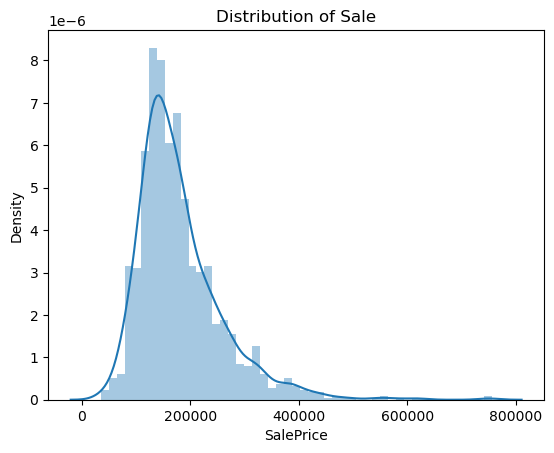

In [58]:
plt.title('Distribution of Sale')
sns.distplot(house["SalePrice"])
plt.show()

**Comment:** Since SalePrice is highly Skewed, Checking the Distribution of transformed SalePrice.

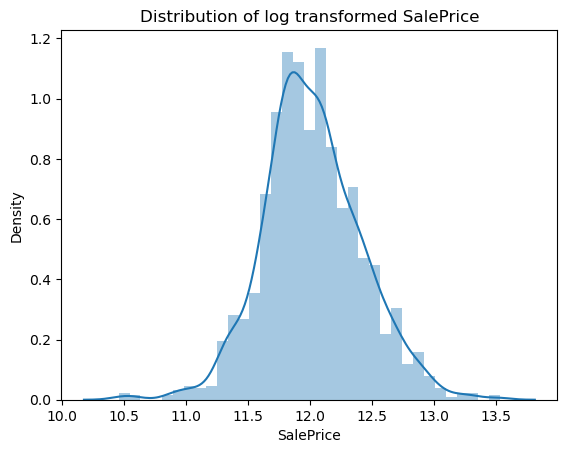

In [59]:
sns.distplot(np.log(house['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [60]:
# log transformed SalePrice is normaliy distributed, hence te transformed data will be used for model building

y = np.log(house['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1451, dtype: float64


In [61]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1160, 96)
(291, 96)
(1160,)
(291,)


In [63]:
X['LotFrontage'].isnull().any()

True

In [64]:
# Imputing value of LotFrontage after spliting training and testing the dataset to prevent data leakage

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [65]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [66]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])


### Feature Scalling

In [67]:
X_train.values

array([[5.0000e+01, 5.4000e+01, 6.3420e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.4500e+02, 2.7500e+01, 2.5220e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 7.0000e+01, 7.9310e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [5.0000e+01, 5.0000e+01, 9.0000e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 4.8000e+01, 1.0635e+04, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 6.7000e+01, 1.0656e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [68]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [69]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [70]:
# Checking the features after 

print(X_tr_scaled)
print(X_te_scaled)

      MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      -0.137941    -0.840191 -0.892882  0.747271   0.029374  -0.225421   
1       2.389253    -2.335542 -1.956426  0.747271   0.029374  -0.225421   
2      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
3      -0.936002     0.000000 -0.396469 -1.386037   0.029374  -0.225421   
4      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
...          ...          ...       ...       ...        ...        ...   
1155    0.128080     0.683374  0.388382 -1.386037   0.029374  -0.225421   
1156    2.389253    -2.335542 -2.214237  0.747271   0.029374  -0.225421   
1157   -0.137941    -1.065905 -0.152856  0.747271   0.029374  -0.225421   
1158   -0.936002    -1.178761  0.302352 -0.674935   0.029374  -0.225421   
1159   -0.936002    -0.106623  0.308199 -1.386037   0.029374  -0.225421   

      HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_Detchd  \
0      -0.283496  

### Initial Feature Selection with RFE

In [71]:
# Given the number of features = n, the function prints and returns top n features selected by RFE
def top_n_features(n, X_tr_scaled, y_train):
    top_n_cols = []

    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m)  # Remove 'n' from here

    rfe = rfe.fit(X_tr_scaled, y_train)
    rfe.support_[:n] = True

    print("Top %d features: " % n)
    rfe_ranking = list(zip(X_tr_scaled.columns, rfe.support_, rfe.ranking_))

    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

# Example usage


In [72]:
# Checking top 45, 50, and 55 features
top_45 = top_n_features(45, X_tr_scaled, y_train)
top_50 = top_n_features(50, X_tr_scaled, y_train)
top_55 = top_n_features(55, X_tr_scaled, y_train)

Top 45 features: 
['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace

In [73]:
# Given the Training Data and list of features, this will provides the statisitical summary of the model
# This Will be  used to check adjusted R_squared value for top 45, 50, and 55 Features

def build_regressor(X_train, y_train, cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1, 1), X_train_ols).fit()
    print(lin_reg.summary())

In [74]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     173.7
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:47:36   Log-Likelihood:                 890.67
No. Observations:                1160   AIC:                            -1639.
Df Residuals:                    1089   BIC:                            -1280.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [75]:
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:47:36   Log-Likelihood:                 891.34
No. Observations:                1160   AIC:                            -1635.
Df Residuals:                    1086   BIC:                            -1261.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [76]:
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     159.6
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:47:37   Log-Likelihood:                 892.32
No. Observations:                1160   AIC:                            -1631.
Df Residuals:                    1083   BIC:                            -1241.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Comments:** By inspecting the Ajusted R-square value of linear Regression model with top_45,top_50,and top_55 features seem to be optimum as model with 50 and 55 features have same the adjusted R-square value on the training data.

In [77]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]


In [78]:
def build_model(X_train, X_test, y_train, params, model='ridge'):
    if model == 'ridge':
        estimator_model = Ridge()
    else:
        estimator_model = Lasso()
    model_cv = GridSearchCV(estimator=estimator_model,
                           param_grid=params,
                           scoring='neg_mean_absolute_error',
                           cv=5,
                           return_train_score=True,
                           verbose=1)
    model_cv.fit(X_train, y_train)
    alpha = model_cv.best_params_['alpha']
    print("Optimum alpha for %s is %f" % (model, alpha))
    final_model = model_cv.best_estimator_
    
    final_model.fit(X_train, y_train)
    y_train_pred = final_model.predict(X_train)
    y_test_pred = final_model.predict(X_test)
    
    # Model Evaluation
    print(model, "Regression with alpha", alpha)
    print("===========================")
    print('R2 score (train):', r2_score(y_train, y_train_pred))
    print('R2 score (test):', r2_score(y_test, y_test_pred))
    print('RMSE (train):', np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('RMSE (test):', np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    return final_model, y_test_pred


### Ridge Regression

In [79]:
# List of alphas to tune
params = {'alpha': [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000]}
ridge_final_model, y_test_predicted = build_model(X_train_rfe, X_test_rfe, y_train, params, model='ridge')


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 8.000000
ridge Regression with alpha 8.0
R2 score (train): 0.9178003342627445
R2 score (test): 0.871664493276473
RMSE (train): 0.11227827858804852
RMSE (test): 0.1531601337036983


**Comments:** Ridge Regression model was able to achieve R2 Score is 87% test data of variance in test data can be explained by model Root mean square error = 0.1531 on test data that means the prediction made by the model can of by 0.1531 units.

### Lasso Regression

In [80]:
params ={'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1.0,10,100,500,10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, X_test_rfe, y_train, params, model='lasso')

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Optimum alpha for lasso is 0.001000
lasso Regression with alpha 0.001
R2 score (train): 0.9165678478211392
R2 score (test): 0.8766142833538809
RMSE (train): 0.11311688657438036
RMSE (test): 0.1501774638706194


### Comparing Model COefficient

In [81]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=9.0)']=ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_
pd.set_option('display.max_row',None)
model_coefficients

,Ridge (alpha=9.0),Lasso (alpha=0.0001)
MSSubClass,-0.002188,-0.000092
LotFrontage,0.009347,0.007266
LotArea,0.029383,0.030696
LotShape,-0.001284,-0.000382
Utilities,0.003666,0.002798
LandSlope,0.009532,0.010066
HouseStyle,0.001549,-0.000000
OverallQual,0.075394,0.078656
OverallCond,0.048333,0.048249
YearBuilt,-0.038212,-0.037342


In [82]:
# Converting the prediction to its orginal scale (anti log)

test_prediction = np.around(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[295203 226988 135502 115818 148340]


### Final Model

Lasso Regression product slightly R2 score on test data than Ridge Regression. Choosing Lasso as the final model

In [83]:
# 50 feature ordered by feature importance in lasso Regression
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)',ascending=False)

,Lasso (alpha=0.0001)
1stFlrSF,0.118748
2ndFlrSF,0.098836
OverallQual,0.078656
OverallCond,0.048249
SaleCondition_Partial,0.032206
BsmtFinSF1,0.030961
LotArea,0.030696
SaleCondition_Normal,0.027590
MSZoning_RL,0.025508
Condition1_Norm,0.023009


In [84]:
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)',ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond',
       'SaleCondition_Partial', 'BsmtFinSF1', 'LotArea',
       'SaleCondition_Normal', 'MSZoning_RL', 'Condition1_Norm'],
      dtype='object')

## Summary

### Summary

- First the housing data is read and analyzed dividing the features into numerical and categorical types.


- SalePrice is the target column here.


- All the features are then analyzed, missing data handling, outlier detection, data cleaning are done. Trend of SalePrice is 
observed for change in individual features.


- New features are extracted, redundant features dropped and categorical features are encoded accordingly.


- Then the data in split into train and test data and feature scaling is performed.


- Target variable SalePrice is right skewed. Natural log of the same is Normal distributed, hence for model building, natural log of SalePrice is considered.


- Creating dummy variables increased the number of features greatly, highly imbalanced columns are dropped.


- Top 50 features are selected through RFE and adjusted R-square. 50 features : 
['MSSubClass', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']


- Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method.
Optimum alpha = 9.0 for ridge and 0.0001 for lasso model.


- Model evaluation is done with R2 score and Root Mean Square Error.


- Lasso Regression is chosen as final model for having slightly better R-square value on test data.


- Out of 50 features in the final model, top 10 features in order of descending importance are ['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial', 'LotArea', 'BsmtFinSF1','SaleCondition_Normal', 'MSZoning_RL', 'Neighborhood_Somerst']


- Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by 0.124911 with unit change in the feature '1stFlrSF' when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable. 


- Predicted value of SalePrice is tranformed into its original scale by performing antilog. 


### FAQ

**Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

**Answers:**
The Optimual values of alpha of ridge and lasso is 8.000000 and 0.001000.


In [85]:
# Double the alpha values
doubled_alpha_ridge = model_coefficients['Ridge (alpha=8.0)'] * 2
doubled_alpha_lasso = model_coefficients['Lasso (alpha=0.0001)'] * 2

# Create DataFrames to store coefficients
ridge_coeffs = pd.DataFrame(index=model_coefficients.index)
lasso_coeffs = pd.DataFrame(index=model_coefficients.index)



KeyError: 'Ridge (alpha=8.0)'

In [ ]:
doubled_alpha_ridge

**Ridge Regression:**

- If you double the alpha value in Ridge regression, it will increase the regularization strength. This means that the model will be penalized more for having large coefficient values. As a result, the coefficients of the predictors will tend to become smaller.
- This increased regularization will lead to a simpler model that is less likely to overfit the training data. It can help prevent multicollinearity by encouraging coefficients to be small but non-zero.
- After doubling alpha, the most important predictor variables will likely remain the same as they were before the change. However, their coefficient values will decrease in magnitude.

In [ ]:
doubled_alpha_lasso

**Lasso Regression:**

- Doubling the alpha value in Lasso regression will also increase the regularization strength. Lasso uses L1 regularization, which encourages some coefficients to be exactly zero. Increasing alpha makes it more likely that Lasso will set more coefficients to zero.
- The impact on the model will be sparsity in the coefficient vector. Many predictor variables may become irrelevant (have coefficients set to zero), effectively performing feature selection. Only a subset of the most important predictor variables will have non-zero coefficients.
- After doubling alpha, the most important predictor variables will be those that Lasso retains with non-zero coefficients.

**Question 2:**

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

**Answers:**

**Ridge Regression:**

- Ridge adds L2 regularization to the linear regression, which penalizes the sum of squared coefficients.
- It is effective when you believe that most of the features are relevant, but I want to prevent multicollinearity and control the magnitude of the coefficients.
- Ridge can be a good choice when we have a large number of features, and we want to avoid feature selection.

**Lasso Regression:**

- Lasso adds L1 regularization, which can lead to sparse coefficient vectors by setting some coefficients to exactly zero.
- It is useful when we suspect that many features are irrelevant, and we want automatic feature selection.
- Lasso can be a good choice when we have a high-dimensional dataset and want to simplify the model by eliminating unimportant predictors.
- In this Problem Statement, since Lasso has a slightly higher R2 score on the test data, it indicates that Lasso's feature selection capability might be more suitable for your dataset, effectively reducing the impact of irrelevant predictors. The choice of Lasso as the final model aligns with goal of achieving better predictive performance.

**Question 3**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [ ]:
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)',ascending=False).index[:5]

Refrence link click here - git@github.com:anwarshaikh042/Assignment_Advanced_Regression.git